#                                     AIBL

<table align="center" width=100%>
    <tr>
        <td>
            <div align="center">
                <font color="#09FC09" size=10px>
                    <b> AIBL with Naives Bayes
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
The data is heterogenous, in relation to Alzheimer’s
disease (AD), which is the most common type of dementia. It has been reported that COVID-19 steeply worsened the neuropsychiatric symptoms of dementia. Making use of the power of AI/ML to benefit healthcare across the board is significant, and dementia is no exception,especially during these extreme circumstances. The data (http://adni.loni.usc.edu/data-samples/access-data/), which has been approved by the AIBL Management Committee for the purpose of teaching, can be accessed in the BBL Assessment area. The data description can be found by using the Data Dictionary search box in http://adni.loni.usc.edu/data-dictionary-search/. The AIBL data were categorised into three clinical diagnostic results: Healthy Control (HC), Mild Cognitive Impairment (MCI), and
Alzheimer’s Disease (AD). This coursework will consider two categories, i.e. HC and NonHC (combining MCI and AD).

## <center>CODE SEGMENTATION </center>

#### The codes would be structured in the following order 

<strong>
    
1. Importing Libraries and installing dependencies </b>
2. Loading the Dataset and Exploratory Data Analysis (EDA) </b>
3. Data cleaning </b>
4. Modelling </b>
5. Supervised learning with Naive-Bayes, XGBoost, Decision-Tree, and RandomForest
6. Unsupervised Learning with Hierarchical-Clustering and Dimesionality Reduction using PCA, and K-Means Nearest Neighbour
7. Modelling Report and  Summary

</strong>

## Importing required libraries and functions

---



In [ ]:
#Run this cell to ensure you don't encounter any import error
#!pip install factor_analyzer sklearn scipy imblearn pandas numpy matplotlib plotly pandas_profiling xgboost lightgbm

In [ ]:
#Import packages

#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly.express as pe
import plotly.offline as po
import os
import glob
from functools import reduce

#Metrics and performance libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, r2_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, plot_confusion_matrix

#Modelling libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from ctypes import LibraryLoader
import imblearn
from imblearn.over_sampling import SMOTE
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

#Supervised and Unsupervised Learning libraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import lightgbm as lgb
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import randint as sp_randint, pearsonr

#Misc
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [ ]:
# Importing the dataset
apoeres_data = pd.read_csv('ML/aibl_apoeres_01-Jun-2018.csv')
cdr_data = pd.read_csv('ML/aibl_cdr_01-Jun-2018.csv')
lab_data = pd.read_csv('ML/aibl_labdata_01-Jun-2018.csv')
med_hist = pd.read_csv('ML/aibl_medhist_01-Jun-2018.csv')
mmse_data = pd.read_csv('ML/aibl_mmse_01-Jun-2018.csv')
neurobat = pd.read_csv('ML/aibl_neurobat_01-Jun-2018.csv')
pdxconv = pd.read_csv('ML/aibl_pdxconv_01-Jun-2018.csv')
ptdemog = pd.read_csv('ML/aibl_ptdemog_01-Jun-2018.csv')

* The **apoeres_data** contain the information about the **Genotype**
* The **cdr_data** contain the information about the **CDR score Cognitive assessment**
* The **lab_data** contain the information about the **Blood test**
* The **med_hist** contain the information about the **Medical history**
* The **mmse_data** contain the information about the **MMSE score score Cognitive assessment**
* The **neurobat** contain the information about the **Logical memory recall score Cognitive assessment**
* The **pdxconv** contain the information about the **Clinical diagnosis**
* The **ptdemog** contain the information about the **Gender and DoB**

In [ ]:
# Exploring some of the dataset
print(apoeres_data.info())
print(cdr_data.info())
print(lab_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RID       862 non-null    int64 
 1   SITEID    862 non-null    int64 
 2   VISCODE   862 non-null    object
 3   APTESTDT  862 non-null    object
 4   APGEN1    862 non-null    int64 
 5   APGEN2    862 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 40.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RID       1688 non-null   int64  
 1   SITEID    1688 non-null   int64  
 2   VISCODE   1688 non-null   object 
 3   EXAMDATE  1688 non-null   object 
 4   CDGLOBAL  1688 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 66.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (t

In [ ]:
# Merging the dataset using "RID" as the primary key
grand_df = [data.set_index('RID') for data in [apoeres_data,cdr_data,lab_data,med_hist,mmse_data,neurobat,pdxconv,ptdemog]]
tdf = reduce(lambda l,r: l.combine_first(r), grand_df)

In [ ]:
tdf.describe(include='all')

,APGEN1,APGEN2,APTESTDT,AXT117,BAT126,CDGLOBAL,DXCURREN,EXAMDATE,HMT100,HMT102,...,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,VISCODE
count,1688.000000,1688.000000,1688,1688.000000,1688.000000,1688.000000,1688.000000,1688,1688.000000,1688.000000,...,1688.000000,1688.000000,1688,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688
unique,NaN,NaN,587,NaN,NaN,NaN,NaN,1030,NaN,NaN,...,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,-4,NaN,NaN,NaN,NaN,08/28/2012,NaN,NaN,...,NaN,NaN,/1943,NaN,NaN,NaN,NaN,NaN,NaN,bl
freq,NaN,NaN,63,NaN,NaN,NaN,NaN,6,NaN,NaN,...,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,1688
mean,3.245261,2.800948,NaN,1.593150,437.843163,0.196386,1.386256,NaN,29.470557,32.119372,...,0.118483,27.410545,NaN,1.518957,87.464581,196.028178,0.629895,35.674350,1.319905,NaN
std,1.042221,0.973605,NaN,1.833466,263.748267,0.476880,0.776874,NaN,7.857270,8.342811,...,0.827901,3.973123,NaN,0.499789,25.550133,61.838228,1.064792,13.522536,0.466578,NaN
min,-4.000000,-4.000000,NaN,-4.000000,-4.000000,-4.000000,-4.000000,NaN,-4.000000,-4.000000,...,-4.000000,-4.000000,NaN,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,NaN
25%,3.000000,3.000000,NaN,1.010000,298.181000,0.000000,1.000000,NaN,30.200000,33.600000,...,0.000000,27.000000,NaN,1.000000,82.874000,170.126000,0.701000,30.035000,1.000000,NaN
50%,3.000000,3.000000,NaN,1.600000,399.834000,0.000000,1.000000,NaN,31.200000,34.000000,...,0.000000,29.000000,NaN,2.000000,88.278000,201.058000,0.826000,35.441000,1.000000,NaN
75%,4.000000,3.000000,NaN,2.400000,528.594000,0.500000,2.000000,NaN,32.100000,34.400000,...,0.000000,30.000000,NaN,2.000000,97.286000,231.990000,0.973000,42.049000,2.000000,NaN


In [ ]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 2 to 1639
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGEN1     1688 non-null   int64  
 1   APGEN2     1688 non-null   int64  
 2   APTESTDT   1688 non-null   object 
 3   AXT117     1688 non-null   float64
 4   BAT126     1688 non-null   float64
 5   CDGLOBAL   1688 non-null   float64
 6   DXCURREN   1688 non-null   int64  
 7   EXAMDATE   1688 non-null   object 
 8   HMT100     1688 non-null   float64
 9   HMT102     1688 non-null   float64
 10  HMT13      1688 non-null   float64
 11  HMT3       1688 non-null   float64
 12  HMT40      1688 non-null   float64
 13  HMT7       1688 non-null   float64
 14  LDELTOTAL  1688 non-null   int64  
 15  LIMMTOTAL  1688 non-null   int64  
 16  MH10GAST   1688 non-null   int64  
 17  MH12RENA   1688 non-null   int64  
 18  MH16SMOK   1688 non-null   int64  
 19  MH17MALI   1688 non-null   int64  
 20  MH2NEURL

In [ ]:
tdf.duplicated().any()

False

In [ ]:
# Creating a csv copy of the merged dataset
tdf.to_csv('grand_data.csv')

In [ ]:
#Load the dataframe from the saved copy
df = pd.read_csv('grand_data.csv', sep=',')
df.describe(include='all')

,RID,APGEN1,APGEN2,APTESTDT,AXT117,BAT126,CDGLOBAL,DXCURREN,EXAMDATE,HMT100,...,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,VISCODE
count,1688.000000,1688.000000,1688.000000,1688,1688.000000,1688.000000,1688.000000,1688.000000,1688,1688.000000,...,1688.000000,1688.000000,1688,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688.000000,1688
unique,NaN,NaN,NaN,587,NaN,NaN,NaN,NaN,1030,NaN,...,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,-4,NaN,NaN,NaN,NaN,08/28/2012,NaN,...,NaN,NaN,/1943,NaN,NaN,NaN,NaN,NaN,NaN,bl
freq,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,6,NaN,...,NaN,NaN,100,NaN,NaN,NaN,NaN,NaN,NaN,1688
mean,654.122630,3.245261,2.800948,NaN,1.593150,437.843163,0.196386,1.386256,NaN,29.470557,...,0.118483,27.410545,NaN,1.518957,87.464581,196.028178,0.629895,35.674350,1.319905,NaN
std,482.486717,1.042221,0.973605,NaN,1.833466,263.748267,0.476880,0.776874,NaN,7.857270,...,0.827901,3.973123,NaN,0.499789,25.550133,61.838228,1.064792,13.522536,0.466578,NaN
min,2.000000,-4.000000,-4.000000,NaN,-4.000000,-4.000000,-4.000000,-4.000000,NaN,-4.000000,...,-4.000000,-4.000000,NaN,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,1.000000,NaN
25%,232.000000,3.000000,3.000000,NaN,1.010000,298.181000,0.000000,1.000000,NaN,30.200000,...,0.000000,27.000000,NaN,1.000000,82.874000,170.126000,0.701000,30.035000,1.000000,NaN
50%,572.000000,3.000000,3.000000,NaN,1.600000,399.834000,0.000000,1.000000,NaN,31.200000,...,0.000000,29.000000,NaN,2.000000,88.278000,201.058000,0.826000,35.441000,1.000000,NaN
75%,1025.250000,4.000000,3.000000,NaN,2.400000,528.594000,0.500000,2.000000,NaN,32.100000,...,0.000000,30.000000,NaN,2.000000,97.286000,231.990000,0.973000,42.049000,2.000000,NaN


## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        1688 non-null   int64  
 1   APGEN1     1688 non-null   int64  
 2   APGEN2     1688 non-null   int64  
 3   APTESTDT   1688 non-null   object 
 4   AXT117     1688 non-null   float64
 5   BAT126     1688 non-null   float64
 6   CDGLOBAL   1688 non-null   float64
 7   DXCURREN   1688 non-null   int64  
 8   EXAMDATE   1688 non-null   object 
 9   HMT100     1688 non-null   float64
 10  HMT102     1688 non-null   float64
 11  HMT13      1688 non-null   float64
 12  HMT3       1688 non-null   float64
 13  HMT40      1688 non-null   float64
 14  HMT7       1688 non-null   float64
 15  LDELTOTAL  1688 non-null   int64  
 16  LIMMTOTAL  1688 non-null   int64  
 17  MH10GAST   1688 non-null   int64  
 18  MH12RENA   1688 non-null   int64  
 19  MH16SMOK   1688 non-null   int64  
 20  MH17MALI

In [ ]:
df.shape

(1688, 36)

In [ ]:
df.columns

Index(['RID', 'APGEN1', 'APGEN2', 'APTESTDT', 'AXT117', 'BAT126', 'CDGLOBAL',
       'DXCURREN', 'EXAMDATE', 'HMT100', 'HMT102', 'HMT13', 'HMT3', 'HMT40',
       'HMT7', 'LDELTOTAL', 'LIMMTOTAL', 'MH10GAST', 'MH12RENA', 'MH16SMOK',
       'MH17MALI', 'MH2NEURL', 'MH4CARD', 'MH6HEPAT', 'MH8MUSCL', 'MH9ENDO',
       'MHPSYCH', 'MMSCORE', 'PTDOB', 'PTGENDER', 'RCT11', 'RCT20', 'RCT392',
       'RCT6', 'SITEID', 'VISCODE'],
      dtype='object')

In [ ]:
# Check for missing values
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(36)

,Total,Percent
RID,0,0.0
APGEN1,0,0.0
MH17MALI,0,0.0
MH2NEURL,0,0.0
MH4CARD,0,0.0
MH6HEPAT,0,0.0
MH8MUSCL,0,0.0
MH9ENDO,0,0.0
MHPSYCH,0,0.0
MMSCORE,0,0.0


In [ ]:
#Checking for correlation
df.corr()

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MH8MUSCL,MH9ENDO,MHPSYCH,MMSCORE,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID
RID,1.000000,-0.185961,-0.163557,-0.052445,0.004255,0.075692,0.144359,-0.133126,-0.132092,-0.084211,...,0.009720,0.050789,0.086429,-0.092149,0.011562,-0.108547,-0.102073,-0.139036,-0.113718,0.049737
APGEN1,-0.185961,1.000000,0.857221,0.084620,0.037371,0.083720,0.074009,0.113406,0.115702,0.057280,...,-0.008709,-0.034273,0.016452,-0.035210,-0.027139,0.074548,0.086107,0.123507,0.091204,0.040908
APGEN2,-0.163557,0.857221,1.000000,0.072633,0.036738,0.066371,0.048419,0.092536,0.097535,0.087376,...,0.006670,-0.027435,0.027806,-0.033415,-0.020259,0.064440,0.092186,0.102961,0.096789,-0.051559
AXT117,-0.052445,0.084620,0.072633,1.000000,0.274648,-0.020715,-0.072235,0.652230,0.662837,0.448783,...,0.007413,-0.040452,-0.000426,0.039831,-0.015507,0.573434,0.479241,0.689355,0.478553,0.077044
BAT126,0.004255,0.037371,0.036738,0.274648,1.000000,0.040946,0.016214,0.346433,0.359245,0.262473,...,0.009524,0.058500,0.050878,-0.016931,0.118423,0.293239,0.303077,0.360654,0.255460,0.080524
CDGLOBAL,0.075692,0.083720,0.066371,-0.020715,0.040946,1.000000,0.599937,-0.011555,-0.006104,0.006478,...,-0.112757,-0.079703,-0.028943,-0.533136,-0.016251,0.016950,-0.010251,-0.001292,-0.017449,-0.046751
DXCURREN,0.144359,0.074009,0.048419,-0.072235,0.016214,0.599937,1.000000,-0.113075,-0.106204,-0.023167,...,-0.129607,-0.118029,-0.004840,-0.632149,-0.000550,-0.072544,-0.066414,-0.105183,-0.080099,-0.041829
HMT100,-0.133126,0.113406,0.092536,0.652230,0.346433,-0.011555,-0.113075,1.000000,0.985390,0.620660,...,0.076882,0.064260,0.066365,0.092020,-0.031655,0.749232,0.659913,0.901679,0.623957,0.046761
HMT102,-0.132092,0.115702,0.097535,0.662837,0.359245,-0.006104,-0.106204,0.985390,1.000000,0.633204,...,0.079342,0.061370,0.063235,0.088953,-0.013117,0.760185,0.681918,0.914077,0.622136,0.032457
HMT13,-0.084211,0.057280,0.087376,0.448783,0.262473,0.006478,-0.023167,0.620660,0.633204,1.000000,...,0.109549,0.009591,0.106780,0.008715,0.214556,0.476982,0.520711,0.559299,0.336702,0.020628


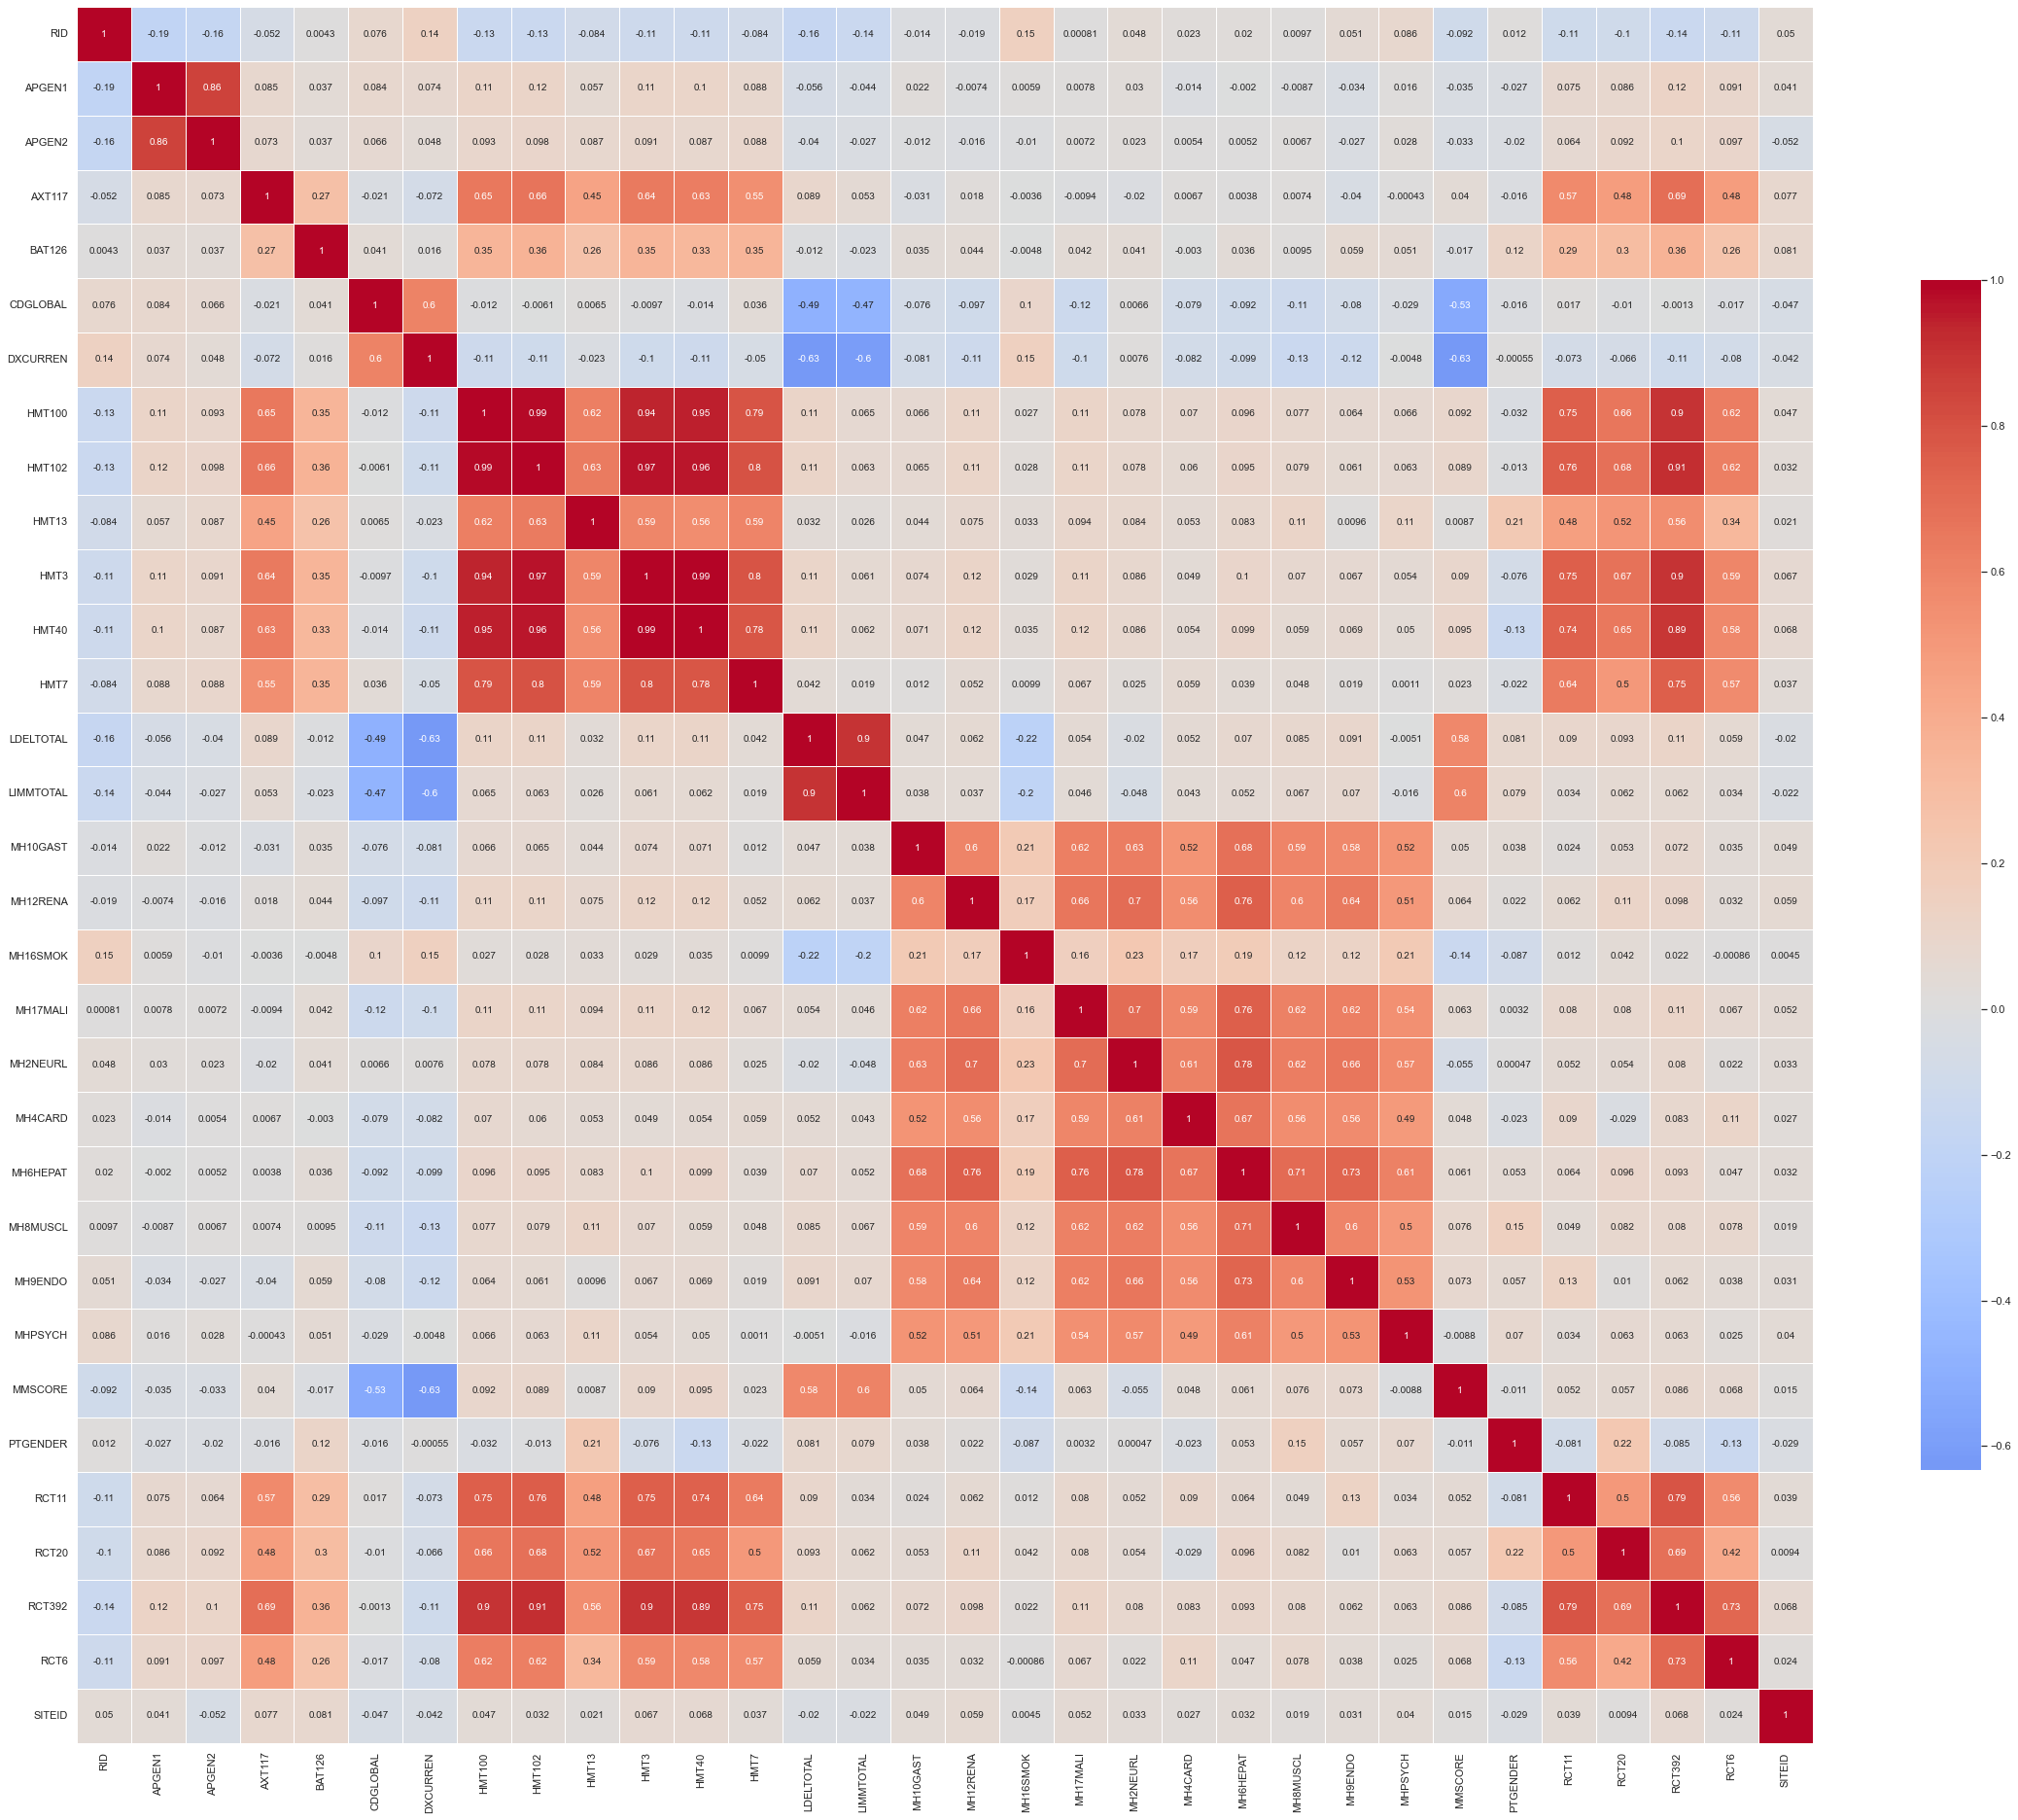

In [ ]:
#plot the correlation
plt.figure(figsize=(40,45))
sns.heatmap(df.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#Making a copy so that i can readily reference the original dataframe where applicable
df1 = df.copy()
df1

,RID,APGEN1,APGEN2,APTESTDT,AXT117,BAT126,CDGLOBAL,DXCURREN,EXAMDATE,HMT100,...,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,VISCODE
0,2,3,3,09/16/2011,1.26,483.867,0.0,1,09/16/2011,32.8,...,0,30,/1941,1,90.080,173.993,0.916,37.844,1,bl
1,2,3,3,09/16/2011,1.01,397.123,0.0,1,04/11/2013,32.7,...,0,30,/1941,1,88.278,181.726,0.928,51.059,1,bl
2,3,4,3,10/19/2007,1.31,402.545,0.0,1,10/12/2007,32.5,...,1,30,/1939,2,129.715,251.322,0.792,18.021,1,bl
3,3,4,3,10/19/2007,2.15,435.074,0.0,1,05/29/2009,31.8,...,1,28,/1939,2,97.286,266.788,0.792,23.427,1,bl
4,3,4,3,10/19/2007,1.94,349.685,0.0,1,10/25/2010,32.7,...,1,27,/1939,2,90.080,301.587,0.735,25.830,1,bl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1632,-4,-4,07/11/2014,1.60,1246.940,0.5,2,07/11/2014,30.4,...,0,27,/1941,1,91.882,158.526,0.713,26.431,2,bl
1684,1634,-4,-4,07/15/2014,4.20,1043.635,-4.0,1,07/15/2014,31.3,...,0,20,/1937,1,97.286,185.592,0.781,25.830,2,bl
1685,1636,-4,-4,07/21/2014,5.40,487.933,0.5,2,07/21/2014,29.2,...,0,28,/1948,1,214.390,162.393,0.826,25.830,2,bl
1686,1637,-4,-4,07/24/2014,1.80,284.628,0.5,2,07/24/2014,31.9,...,0,28,/1947,1,100.890,297.721,0.792,20.424,2,bl


### Data Cleaning

In [ ]:
#Dropping the columns with the same information and high cardinality
df1.drop("RID", axis=1, inplace=True)
df1.drop("SITEID", axis=1, inplace=True)
df1.drop("VISCODE", axis=1, inplace=True)
df1.drop("EXAMDATE", axis=1, inplace=True)
df1.drop("APTESTDT", axis=1, inplace=True)
df1.head()

,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,HMT3,...,MH8MUSCL,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6
0,3,3,1.26,483.867,0.0,1,32.8,34.3,220.0,4.39,...,0,0,0,30,/1941,1,90.080,173.993,0.916,37.844
1,3,3,1.01,397.123,0.0,1,32.7,34.4,190.0,4.56,...,0,0,0,30,/1941,1,88.278,181.726,0.928,51.059
2,4,3,1.31,402.545,0.0,1,32.5,34.2,254.0,3.87,...,0,0,1,30,/1939,2,129.715,251.322,0.792,18.021
3,4,3,2.15,435.074,0.0,1,31.8,33.8,311.0,3.90,...,0,0,1,28,/1939,2,97.286,266.788,0.792,23.427
4,4,3,1.94,349.685,0.0,1,32.7,33.9,226.0,3.75,...,0,0,1,27,/1939,2,90.080,301.587,0.735,25.830


In [ ]:
# Replacing an anomaly in the PTDOB column
df1['PTDOB'] = df1['PTDOB'].str.strip('/')
df1['PTDOB'] = df1['PTDOB'].astype(int)

df1['PTDOB'].head()

0    1941
1    1941
2    1939
3    1939
4    1939
Name: PTDOB, dtype: int32

In [ ]:
# Check for missing values
total = df1.isnull().sum().sort_values(ascending = False)
percent = (df1.isnull().sum() / df1.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(31)

,Total,Percent
APGEN1,0,0.0
MH16SMOK,0,0.0
RCT392,0,0.0
RCT20,0,0.0
RCT11,0,0.0
PTGENDER,0,0.0
PTDOB,0,0.0
MMSCORE,0,0.0
MHPSYCH,0,0.0
MH9ENDO,0,0.0


In [ ]:
print(df1.info())
print()
print('The shape of our features is:', df1.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGEN1     1688 non-null   int64  
 1   APGEN2     1688 non-null   int64  
 2   AXT117     1688 non-null   float64
 3   BAT126     1688 non-null   float64
 4   CDGLOBAL   1688 non-null   float64
 5   DXCURREN   1688 non-null   int64  
 6   HMT100     1688 non-null   float64
 7   HMT102     1688 non-null   float64
 8   HMT13      1688 non-null   float64
 9   HMT3       1688 non-null   float64
 10  HMT40      1688 non-null   float64
 11  HMT7       1688 non-null   float64
 12  LDELTOTAL  1688 non-null   int64  
 13  LIMMTOTAL  1688 non-null   int64  
 14  MH10GAST   1688 non-null   int64  
 15  MH12RENA   1688 non-null   int64  
 16  MH16SMOK   1688 non-null   int64  
 17  MH17MALI   1688 non-null   int64  
 18  MH2NEURL   1688 non-null   int64  
 19  MH4CARD    1688 non-null   int64  
 20  MH6HEPAT

<AxesSubplot:xlabel='PTGENDER', ylabel='count'>

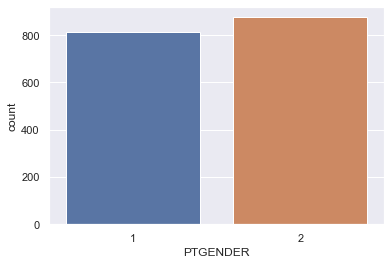

In [ ]:
#Plotting the test ratio Male to Female
sns.countplot(df1['PTGENDER'])

More Male come for diagnosis
* 1 stands for **Female**
* 2 stands for **Male**

<AxesSubplot:xlabel='DXCURREN', ylabel='count'>

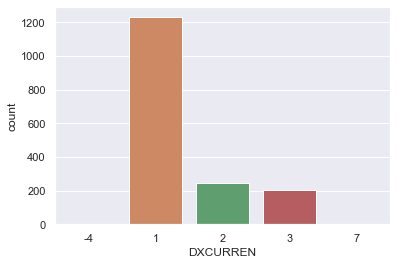

In [ ]:
#Plotting the diagnosis report
sns.countplot(df1['DXCURREN'])

:'-4' and '7' are very rare event, hence they will be replaced with the most frequent '1'

* **1** stands for **healthy control (HC)** which is most frequent diagnosis result
* **2** stands for **mild cognitive impairment (MCI)** of which the frequency is very low compared to HC
* **3** stands for **Alzheimer’s disease (AD)** which is least frequent diagnosis result.

In [ ]:
# replace the least important values with the most frequent value
df1['DXCURREN'] = df1['DXCURREN'].replace([-4, 7], 1)

<AxesSubplot:xlabel='DXCURREN', ylabel='count'>

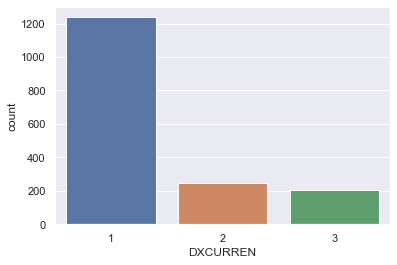

In [ ]:
#An updated plot after resolving the outliers
sns.countplot(df1['DXCURREN'])

### Model Building

## Splitting the dataset

In [ ]:
X = df1.drop("DXCURREN", axis=1)
y = df1["DXCURREN"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

 **Writing a Function**

In [ ]:
def describe_model(estimator, X, y):
    print(f"Cross-validation accuracy: {cross_val_score(estimator, X, y, scoring = 'accuracy').mean():.3f}")
    
    selector_forward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "forward")
    selector_forward.fit(X, y)
    X_FW = selector_forward.transform(X)
    print(f"Accuracy with forward selection of 5 features: {cross_val_score(estimator, X_FW, y, scoring = 'accuracy').mean():.3f}")
    
    selector_backward = SequentialFeatureSelector(estimator, n_features_to_select = 5, direction = "backward")
    selector_backward.fit(X, y)
    X_BW = selector_backward.transform(X)
    print(f"Accuracy with backward selection of 5 features: {cross_val_score(estimator, X_BW, y, scoring = 'accuracy').mean():.3f}")

### Gaussian Naives Bayes

In [ ]:
# Using Naives Bayes as our baseline model
gnb = naive_bayes.GaussianNB(priors=None, var_smoothing=1e-09)
describe_model(gnb, X_train, y_train)

Cross-validation accuracy: 0.815
Accuracy with forward selection of 5 features: 0.910
Accuracy with backward selection of 5 features: 0.910


In [ ]:
# Fitting the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test) 

# Accuracy on Train
print("Training Accuracy is: ", gnb.score(X_train, y_train)) 
# Accuracy on Test
print("Testing Accuracy is: ", gnb.score(X_test, y_test))

Training Accuracy is:  0.81855249745158
Testing Accuracy is:  0.8579881656804734


In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8580


In [ ]:
skor = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', skor)
print()
print("Classification report")
print(classification_report(y_test, y_pred))

Accuracy_score is: 0.8579881656804734

Classification report
              precision    recall  f1-score   support

           1       0.96      0.90      0.93       257
           2       0.53      0.71      0.60        41
           3       0.70      0.75      0.72        40

    accuracy                           0.86       338
   macro avg       0.73      0.79      0.75       338
weighted avg       0.88      0.86      0.87       338



<AxesSubplot:title={'center':'NAIVE BAYES MODEL'}>

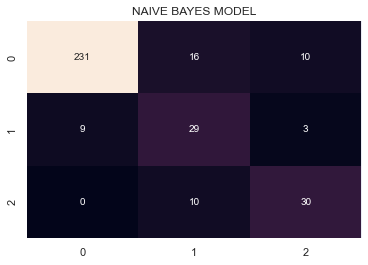

In [ ]:
#Plot it in seaborn heatmap
n_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.title("NAIVE BAYES MODEL")
sns.heatmap(n_cnf_matrix, annot=True, cbar=False, fmt='g')

In [ ]:
#Evaluating the model performance
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the {type(gnb).__name__} is {round(accuracy, 2) * 100}%\n")

The accuracy of the GaussianNB is 86.0%



**The model performed well and hence hyparameter tuning is not necessary.**:

# AIBL with Xgboost


Using XGBoost to predict the possible result of some clinical diagnosis.

In [ ]:
#Using a new copy of dataset for XGBoost
df2 = df.copy()

In [ ]:
df2.columns

Index(['RID', 'APGEN1', 'APGEN2', 'APTESTDT', 'AXT117', 'BAT126', 'CDGLOBAL',
       'DXCURREN', 'EXAMDATE', 'HMT100', 'HMT102', 'HMT13', 'HMT3', 'HMT40',
       'HMT7', 'LDELTOTAL', 'LIMMTOTAL', 'MH10GAST', 'MH12RENA', 'MH16SMOK',
       'MH17MALI', 'MH2NEURL', 'MH4CARD', 'MH6HEPAT', 'MH8MUSCL', 'MH9ENDO',
       'MHPSYCH', 'MMSCORE', 'PTDOB', 'PTGENDER', 'RCT11', 'RCT20', 'RCT392',
       'RCT6', 'SITEID', 'VISCODE'],
      dtype='object')

In [ ]:
df2.shape

(1688, 36)

In [ ]:
df2 = df2.drop(['RID', 'SITEID', 'VISCODE', 'APTESTDT'], axis = 1) 
#Dropping the column with the same information 

print("The variable 'df2' is the data we will be using for further procedure, shown below (displaying the first five rows below) \n\n")

df2.head()

The variable 'df2' is the data we will be using for further procedure, shown below (displaying the first five rows below) 




,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,EXAMDATE,HMT100,HMT102,HMT13,...,MH8MUSCL,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6
0,3,3,1.26,483.867,0.0,1,09/16/2011,32.8,34.3,220.0,...,0,0,0,30,/1941,1,90.080,173.993,0.916,37.844
1,3,3,1.01,397.123,0.0,1,04/11/2013,32.7,34.4,190.0,...,0,0,0,30,/1941,1,88.278,181.726,0.928,51.059
2,4,3,1.31,402.545,0.0,1,10/12/2007,32.5,34.2,254.0,...,0,0,1,30,/1939,2,129.715,251.322,0.792,18.021
3,4,3,2.15,435.074,0.0,1,05/29/2009,31.8,33.8,311.0,...,0,0,1,28,/1939,2,97.286,266.788,0.792,23.427
4,4,3,1.94,349.685,0.0,1,10/25/2010,32.7,33.9,226.0,...,0,0,1,27,/1939,2,90.080,301.587,0.735,25.830


In [ ]:
# Check for missing values
df2.isnull().sum()

APGEN1       0
APGEN2       0
AXT117       0
BAT126       0
CDGLOBAL     0
DXCURREN     0
EXAMDATE     0
HMT100       0
HMT102       0
HMT13        0
HMT3         0
HMT40        0
HMT7         0
LDELTOTAL    0
LIMMTOTAL    0
MH10GAST     0
MH12RENA     0
MH16SMOK     0
MH17MALI     0
MH2NEURL     0
MH4CARD      0
MH6HEPAT     0
MH8MUSCL     0
MH9ENDO      0
MHPSYCH      0
MMSCORE      0
PTDOB        0
PTGENDER     0
RCT11        0
RCT20        0
RCT392       0
RCT6         0
dtype: int64

In [ ]:
#Dropping highly correlated columns
df2 = df2.drop(['HMT102', 'MMSCORE', 'HMT3', 'HMT40', 'LDELTOTAL', 'LIMMTOTAL'], axis = 1)

In [ ]:
# Extracting the day and year of from the 'EXAM YEAR' column

df2['EXAMDATE'] = pd.to_datetime(df2['EXAMDATE'], errors = 'coerce', format = '%m/%d/%Y')

df2['exam_month'] = df2['EXAMDATE'].dt.month
df2['exam_year'] = df2['EXAMDATE'].dt.year
df2['exam_day'] = df2['EXAMDATE'].dt.day

In [ ]:
df2 = df2.drop('EXAMDATE', axis = 1)

In [ ]:
df2.shape

(1688, 28)

In [ ]:
# Correcting the anomaly in the PTDATE column
df2['PTDOB'] = df2['PTDOB'].str.strip('/')
df2['PTDOB'] = df2['PTDOB'].astype(int)

In [ ]:
df2.isna().sum()

APGEN1        0
APGEN2        0
AXT117        0
BAT126        0
CDGLOBAL      0
DXCURREN      0
HMT100        0
HMT13         0
HMT7          0
MH10GAST      0
MH12RENA      0
MH16SMOK      0
MH17MALI      0
MH2NEURL      0
MH4CARD       0
MH6HEPAT      0
MH8MUSCL      0
MH9ENDO       0
MHPSYCH       0
PTDOB         0
PTGENDER      0
RCT11         0
RCT20         0
RCT392        0
RCT6          0
exam_month    7
exam_year     7
exam_day      7
dtype: int64

##### PREPARING THE TARGET VARIABLE

'-4' and '7' are very rare event, hence they will be replaced with the most frequent '1'
1 stands for healthy control (HC) which is most frequent diagnosis result
2 stands for mild cognitive impairment (MCI) of which the frequency is very low compared to HC
3 stands for Alzheimer’s disease (AD) which is least frequent diagnosis result.

In [ ]:
# replace the least important values with the most frequent value
df2['DXCURREN'] = df2['DXCURREN'].replace([-4, 7], 1)

<AxesSubplot:xlabel='DXCURREN', ylabel='count'>

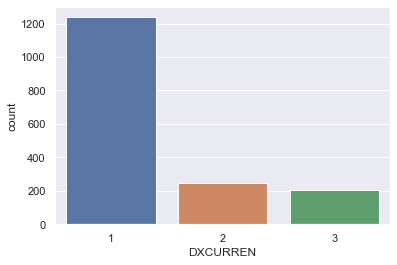

In [ ]:
sns.countplot(df2['DXCURREN'])

In [ ]:
#dropping the rows with null/missing values
df2.dropna(inplace=True)

#Checking the shape
df2.shape

(1681, 28)

Splitting the data

In [ ]:
# Selecting the dependent and independent variable
X = df2.drop('DXCURREN', axis = 1)
y = df2['DXCURREN']

In [ ]:
# Splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) 

In [ ]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# Model Training with Xgboost algorithm
Extreme Gradient Boosting is a distributed gradient-boosted decision tree machine learning toolkit that is scalable.
Xgboost has both Regression and Classification algorithm but in this case, we are using the boosting algorithm which will predict three(3) classes
It does not also requires feature scaling because it's comprises of Decision Trees, hence the data wasn't scaled.

In [ ]:
xg_train = xgb.DMatrix(x_train, label=y_train)
xg_test = xgb.DMatrix(x_test, label=y_test)

In [ ]:
# setup parameters for xgboost
param = {}

# scale weight of positive examples
param['eta'] = 0.1
param['max_depth'] = 6
param['nthread'] = 4
param['num_class'] = 6

watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 5
xgb_model = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-mlogloss:1.53337	test-mlogloss:1.54664
[1]	train-mlogloss:1.33904	test-mlogloss:1.36495
[2]	train-mlogloss:1.18436	test-mlogloss:1.21973
[3]	train-mlogloss:1.05539	test-mlogloss:1.10183
[4]	train-mlogloss:0.94794	test-mlogloss:1.00330


In [ ]:
# get prediction
y_pred = xgb_model.predict(xg_test)

Since the missing values in the columns with missing values is more, we will be dropping those column so as to have a good model result.


In [ ]:
#Evaluating the model performance
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the {type(xgb_model).__name__} is {round(accuracy_score(y_pred, y_test) * 100)}%")

The accuracy of the Booster is 90%


<AxesSubplot:>

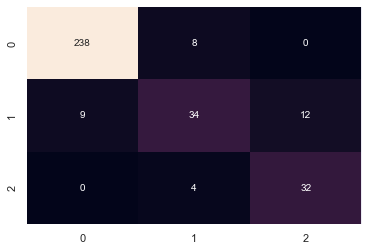

In [ ]:
x_c_mat = confusion_matrix(y_pred, y_test)
sns.heatmap(x_c_mat, annot=True, fmt='d', cbar=False)

The model performed well and hence hyparameter tuning is not necessarily.

# AIBL with Decision Tree algorithm
</br>

Using Decision Tree to predict the likelihood of the diseases /illness one is likely to be affected with




In [ ]:
# Selecting the dependent and independent variable

x = df2.drop('DXCURREN', axis = 1)
y = df2['DXCURREN']

In [ ]:
# Splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) 

In [ ]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

# Model Training with Decision tree algorithm
Decision Trees are a sort of Supervised Machine Learning in which the data is continually split according to a parameter (you explain what the input is and what the related output is in the training data). Two entities, namely decision nodes and leaves, can be used to explain the tree. The decisions or consequences are represented by the leaves.
Decision Tree has both Regression and Classification algorithm but in this case, we are using a classifier which will predict three(3) classes
It does not also requires feature scaling, hence the data wasn't scaled.

In [ ]:
#Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Evaluating the model performance
y_pred = dtree.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)
print(f"The accuracy of the {type(dtree).__name__} is {round(accuracy_score(y_pred, y_test) * 100)}%\n\n")

The accuracy of the DecisionTreeClassifier is 88%




<AxesSubplot:title={'center':'DECISION TREE MODEL'}>

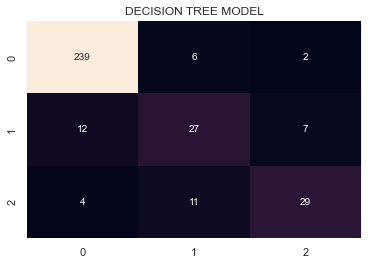

In [ ]:
#Plot it in seaborn heatmap
d_cnf_matrix = confusion_matrix(y_test, y_pred)
plt.title("DECISION TREE MODEL")
sns.heatmap(d_cnf_matrix, annot=True, cbar=False, fmt='g')

# Hyparameter Tuning

In [ ]:
params = {'max_depth' : (3,5,7,9,10,15,20,25),
          'criterion' : ('gini', 'entropy'),
          'max_features' : ('auto', 'sqrt', 'log2'),
          'min_samples_split' : (2,4,6)
          }

In [ ]:
dt_tune  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = params, cv = 5, verbose = True)

In [ ]:
dt_tune.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [ ]:
dt_tune.best_estimator_

DecisionTreeClassifier(max_depth=20, max_features='sqrt', min_samples_split=6)

In [ ]:
#Rebuilding the model with best estimators
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto')
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto')

In [ ]:
dt_pred = dt_model.predict(x_test)
accur = accuracy_score(dt_pred, y_test)
print(f"The accuracy of the tuned model is {round(accuracy_score(y_pred, y_test) * 100)}%")

The accuracy of the tuned model is 88%


The accuracy of the model didn't change after the model tuning, we conclude that Decision Tree would need more training data for better performance

### AIBL with RandomForrest

### Splitting the dataset

In [ ]:
x = df2.drop("DXCURREN", axis=1)
y = df2["DXCURREN"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
#Balancing the dataset by over sampling the training data
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

### Feature importance in Random Forest Model

In [ ]:
RandomF = RandomForestClassifier(random_state=42)
R_ForestModel=RandomF.fit(x, y)

Feature: APGEN1, Score: 0.02534|					Feature: APGEN2, Score: 0.01801|					Feature: AXT117, Score: 0.03111|					Feature: BAT126, Score: 0.02955|					Feature: CDGLOBAL, Score: 0.49310|					Feature: DXCURREN, Score: 0.02893|					Feature: HMT100, Score: 0.03101|					Feature: HMT13, Score: 0.02980|					Feature: HMT7, Score: 0.00798|					Feature: MH10GAST, Score: 0.00507|					Feature: MH12RENA, Score: 0.01865|					Feature: MH16SMOK, Score: 0.00534|					Feature: MH17MALI, Score: 0.01143|					Feature: MH2NEURL, Score: 0.00584|					Feature: MH4CARD, Score: 0.00359|					Feature: MH6HEPAT, Score: 0.00976|					Feature: MH8MUSCL, Score: 0.00777|					Feature: MH9ENDO, Score: 0.00790|					Feature: MHPSYCH, Score: 0.04163|					Feature: PTDOB, Score: 0.00762|					Feature: PTGENDER, Score: 0.02561|					Feature: RCT11, Score: 0.03268|					Feature: RCT20, Score: 0.02907|					Feature: RCT392, Score: 0.02979|					Feature: RCT6, Score: 0.01916|					Feature: exam_month, Score: 0.01913|					Feature: exam_year,

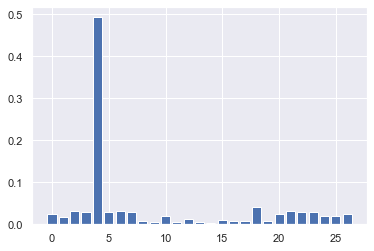

In [ ]:
importance = R_ForestModel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (df2.columns[i],v), end='|\t\t\t\t\t')
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Analysis of the important variables

In [ ]:
#Slice the original dataset
df3 = df1.iloc[:,[4,5,6,7,8,9,11,12,23,27,28,29]]

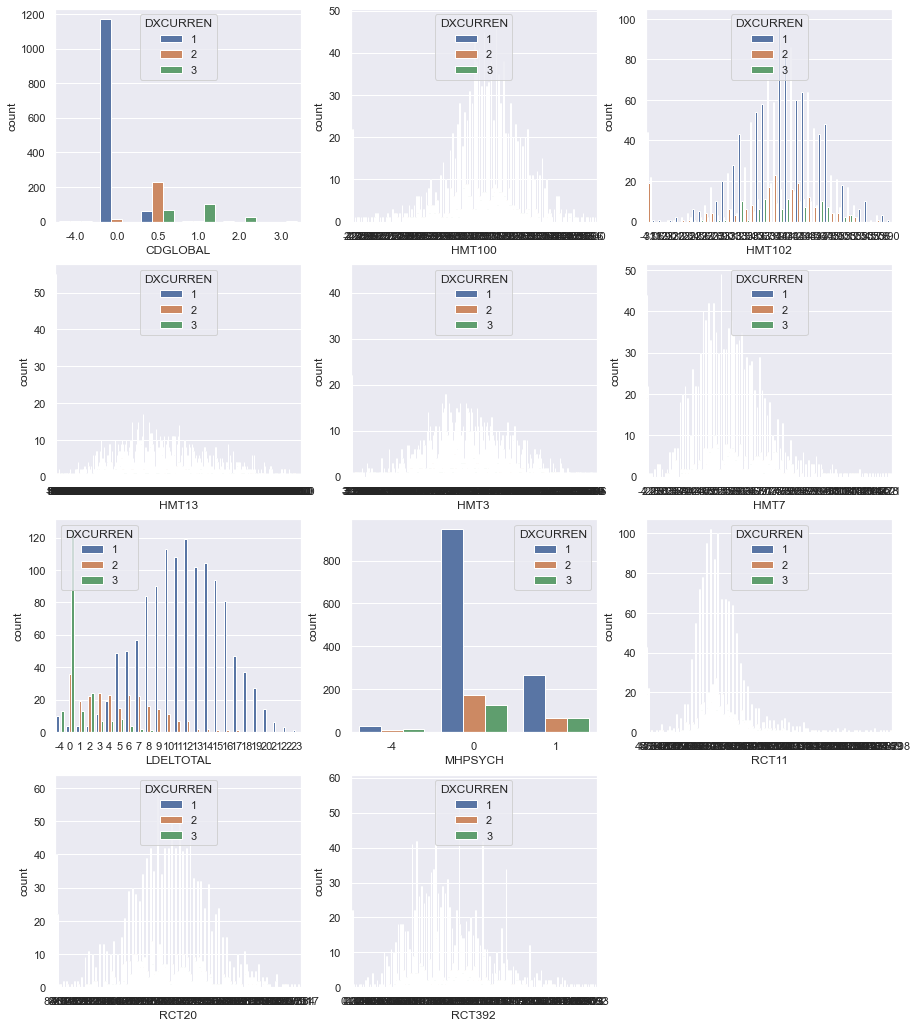

In [ ]:
# plotting responses against important features to observe difference of responses between different categories
i=1
plt.figure(figsize=(15, 18))
for f in df3.drop("DXCURREN",axis=1).columns:
    plt.subplot(4, 3, i)
    sns.countplot(data=df1, x=f,hue='DXCURREN')
    i +=1

### Model Building

### Random Forest

In [ ]:
random_forest = RandomForestClassifier() 
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(X=x_test) 

# Accuracy on Test
print("Training Accuracy is: ", random_forest.score(x_train, y_train)) 

# Accuracy on Train 
print("Testing Accuracy is: ", random_forest.score(x_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.9020771513353115


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy_score is:', accuracy)
print()
print("Classification report")
rf_cnf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

Accuracy_score is: 0.9020771513353115

Classification report
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       247
           2       0.61      0.76      0.68        46
           3       0.91      0.70      0.79        44

    accuracy                           0.90       337
   macro avg       0.83      0.81      0.81       337
weighted avg       0.91      0.90      0.90       337



<AxesSubplot:>

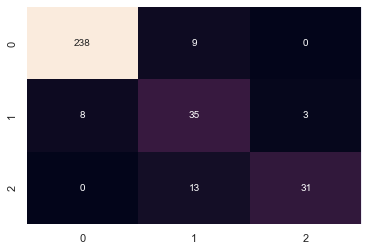

In [ ]:
#Preview the heatmap of the model's performance
sns.heatmap(rf_cnf_matrix, annot=True, cbar=False, fmt='d')

#### The model performed well and hence hyparameter tuning is not necessary.

## Hierachical, Clustering and PCA

In [ ]:
AIBL=df.copy()

In [ ]:
AIBL.head()

,RID,APGEN1,APGEN2,APTESTDT,AXT117,BAT126,CDGLOBAL,DXCURREN,EXAMDATE,HMT100,...,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,VISCODE
0,2,3,3,09/16/2011,1.26,483.867,0.0,1,09/16/2011,32.8,...,0,30,/1941,1,90.080,173.993,0.916,37.844,1,bl
1,2,3,3,09/16/2011,1.01,397.123,0.0,1,04/11/2013,32.7,...,0,30,/1941,1,88.278,181.726,0.928,51.059,1,bl
2,3,4,3,10/19/2007,1.31,402.545,0.0,1,10/12/2007,32.5,...,1,30,/1939,2,129.715,251.322,0.792,18.021,1,bl
3,3,4,3,10/19/2007,2.15,435.074,0.0,1,05/29/2009,31.8,...,1,28,/1939,2,97.286,266.788,0.792,23.427,1,bl
4,3,4,3,10/19/2007,1.94,349.685,0.0,1,10/25/2010,32.7,...,1,27,/1939,2,90.080,301.587,0.735,25.830,1,bl


In [ ]:
#info method prints information about the dataset
AIBL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1688 entries, 0 to 1687
Data columns (total 36 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        1688 non-null   int64  
 1   APGEN1     1688 non-null   int64  
 2   APGEN2     1688 non-null   int64  
 3   APTESTDT   1688 non-null   object 
 4   AXT117     1688 non-null   float64
 5   BAT126     1688 non-null   float64
 6   CDGLOBAL   1688 non-null   float64
 7   DXCURREN   1688 non-null   int64  
 8   EXAMDATE   1688 non-null   object 
 9   HMT100     1688 non-null   float64
 10  HMT102     1688 non-null   float64
 11  HMT13      1688 non-null   float64
 12  HMT3       1688 non-null   float64
 13  HMT40      1688 non-null   float64
 14  HMT7       1688 non-null   float64
 15  LDELTOTAL  1688 non-null   int64  
 16  LIMMTOTAL  1688 non-null   int64  
 17  MH10GAST   1688 non-null   int64  
 18  MH12RENA   1688 non-null   int64  
 19  MH16SMOK   1688 non-null   int64  
 20  MH17MALI

In [ ]:
#replacing and cleaning data for exploration
AIBL["PTDOB"]=AIBL["PTDOB"].str.replace("/", "", regex=False).astype(int)
#drop columns for standardization
AIBL.drop(columns=["VISCODE","APTESTDT", "EXAMDATE"], inplace=True)
# replaces abnormalities in the dataset with the mean values
AIBL=AIBL.replace(-4, AIBL.mean(), regex=False).astype(int)
AIBL["MH16SMOK"]=AIBL["MH16SMOK"].replace(-1, 0, regex=False).astype(int)

In [ ]:
AIBL.head()

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID
0,2,3,3,1,483,0,1,32,34,220,...,0,0,30,1941,1,90,173,0,37,1
1,2,3,3,1,397,0,1,32,34,190,...,0,0,30,1941,1,88,181,0,51,1
2,3,4,3,1,402,0,1,32,34,254,...,0,1,30,1939,2,129,251,0,18,1
3,3,4,3,2,435,0,1,31,33,311,...,0,1,28,1939,2,97,266,0,23,1
4,3,4,3,1,349,0,1,32,33,226,...,0,1,27,1939,2,90,301,0,25,1


In [ ]:
#calculates age as at the data of report
AIBL["PTDOB"]=2018 - AIBL["PTDOB"]

## Data Exploration

In [ ]:
AIBL.isnull().sum()

RID          0
APGEN1       0
APGEN2       0
AXT117       0
BAT126       0
CDGLOBAL     0
DXCURREN     0
HMT100       0
HMT102       0
HMT13        0
HMT3         0
HMT40        0
HMT7         0
LDELTOTAL    0
LIMMTOTAL    0
MH10GAST     0
MH12RENA     0
MH16SMOK     0
MH17MALI     0
MH2NEURL     0
MH4CARD      0
MH6HEPAT     0
MH8MUSCL     0
MH9ENDO      0
MHPSYCH      0
MMSCORE      0
PTDOB        0
PTGENDER     0
RCT11        0
RCT20        0
RCT392       0
RCT6         0
SITEID       0
dtype: int64

In [ ]:
#pearson correllation
AIBL.corr()

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID
RID,1.000000,-0.000528,0.014593,0.028451,0.051206,0.047285,0.160518,-0.078614,-0.141393,-0.025862,...,0.068688,0.107064,-0.104872,-0.270091,0.011562,-0.025096,-0.031913,-0.091735,-0.046006,0.049737
APGEN1,-0.000528,1.000000,0.332689,0.047601,0.004334,0.145806,0.242581,0.020177,-0.005939,-0.043801,...,-0.043739,0.047760,-0.164974,0.005647,-0.041469,-0.033182,0.020751,0.074749,-0.008664,0.113069
APGEN2,0.014593,0.332689,1.000000,0.027730,0.026532,0.113495,0.174339,-0.006184,0.005711,0.044153,...,-0.051911,0.075980,-0.146883,-0.021470,-0.027783,-0.010158,0.083817,0.010089,0.046262,-0.087148
AXT117,0.028451,0.047601,0.027730,1.000000,0.031896,0.037552,0.005616,0.029916,0.042037,0.033721,...,-0.032589,-0.041145,-0.023704,0.018542,0.004137,0.053657,-0.021147,0.069327,0.042359,0.086338
BAT126,0.051206,0.004334,0.026532,0.031896,1.000000,0.051685,0.057027,-0.041382,0.002393,0.047247,...,0.079206,0.066609,-0.058966,-0.010552,0.133384,-0.023269,0.047827,-0.065520,-0.001097,0.069669
CDGLOBAL,0.047285,0.145806,0.113495,0.037552,0.051685,1.000000,0.620988,-0.026638,-0.021162,0.023476,...,-0.051403,0.048570,-0.774940,0.046507,0.045497,0.021370,0.030317,-0.000455,-0.010981,-0.026468
DXCURREN,0.160518,0.242581,0.174339,0.005616,0.057027,0.620988,1.000000,-0.083135,-0.074234,0.034703,...,-0.075374,0.105831,-0.716852,0.118341,-0.017415,0.022622,0.005345,0.016135,-0.001663,-0.046858
HMT100,-0.078614,0.020177,-0.006184,0.029916,-0.041382,-0.026638,-0.083135,1.000000,0.477371,-0.006875,...,-0.003719,0.014651,0.059918,0.058677,-0.131640,0.066623,-0.072212,0.108328,0.107140,-0.016672
HMT102,-0.141393,-0.005939,0.005711,0.042037,0.002393,-0.021162,-0.074234,0.477371,1.000000,-0.021742,...,-0.014067,0.004755,0.062048,0.058557,-0.094359,0.107810,0.014784,0.091748,0.028164,-0.196321
HMT13,-0.025862,-0.043801,0.044153,0.033721,0.047247,0.023476,0.034703,-0.006875,-0.021742,1.000000,...,-0.091477,0.062685,-0.053067,-0.036376,0.314424,-0.018834,0.196857,-0.108160,-0.108204,-0.015117


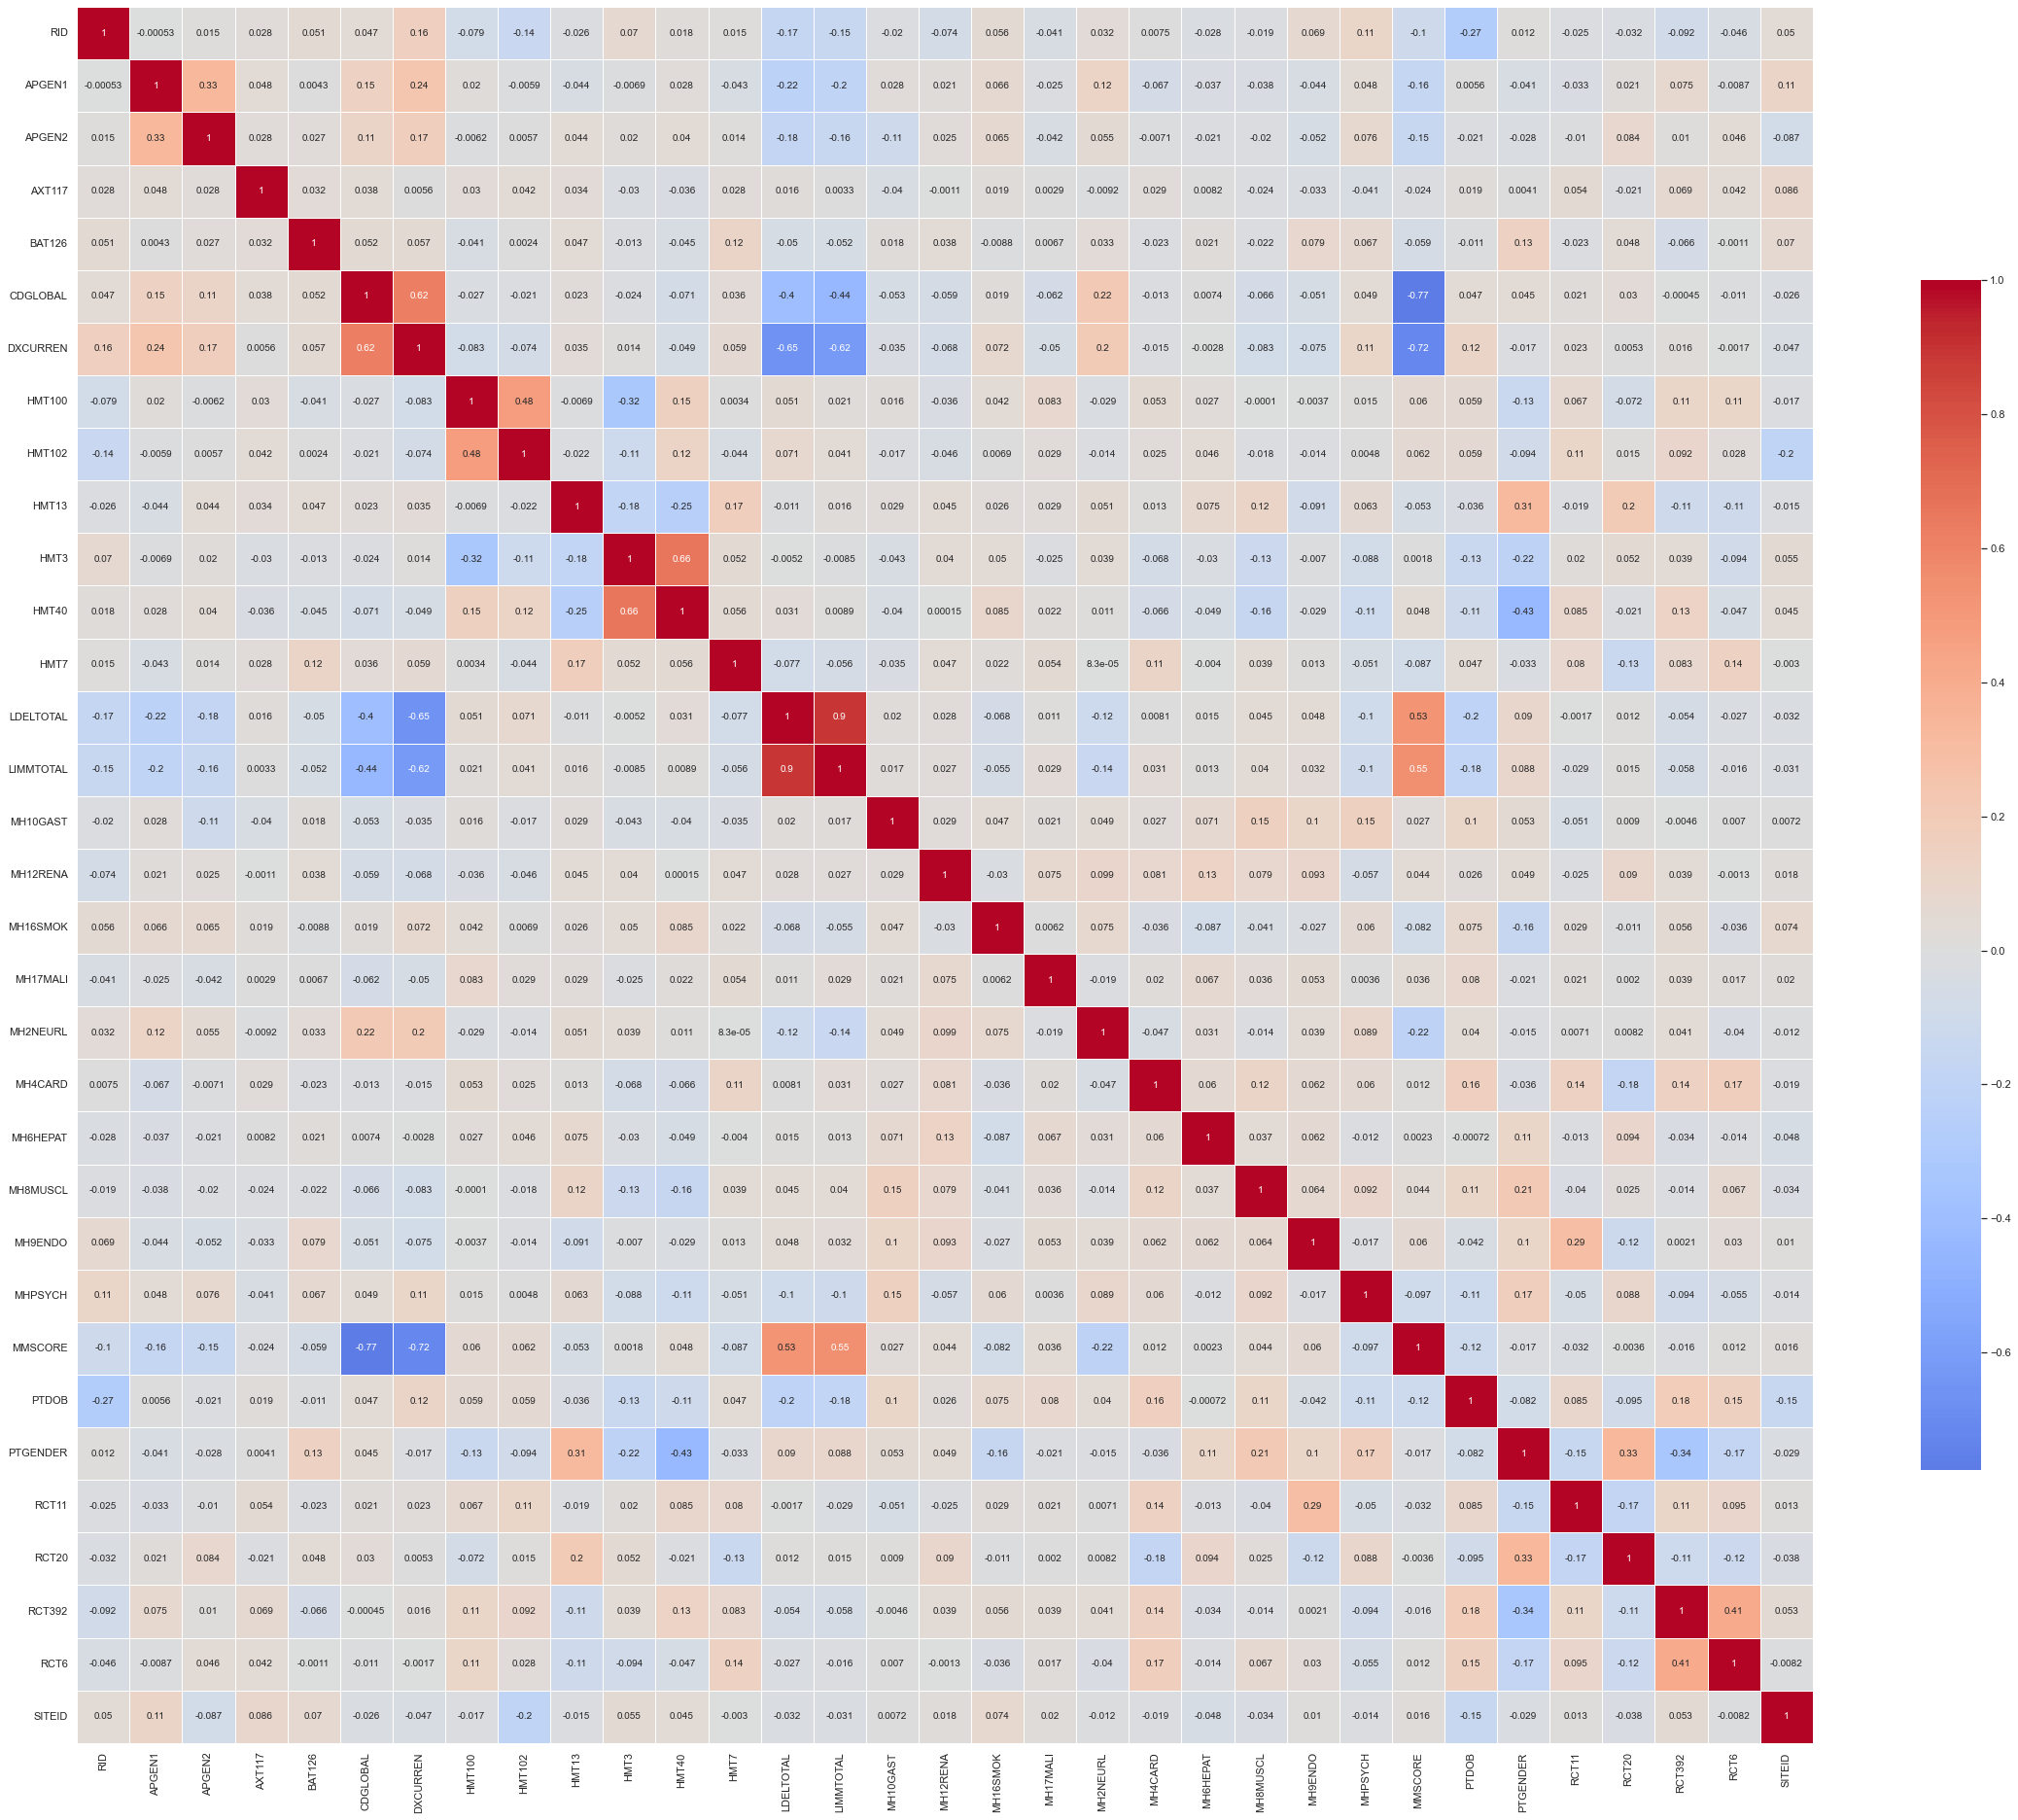

In [ ]:
#checking for correlation
plt.figure(figsize=(40,45))
sns.heatmap(AIBL.corr(),cmap='coolwarm', center=0, square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

### Standardization

In [ ]:
# standardization of dataset to ensure all feature have equal weight
scaler = StandardScaler()
AIBL_std = scaler.fit_transform(AIBL)

### Hierchical Clustering

In [ ]:
#hierachical clustering with ward method and dendrogram
hierarchical_clust = linkage(AIBL_std, method = 'ward')

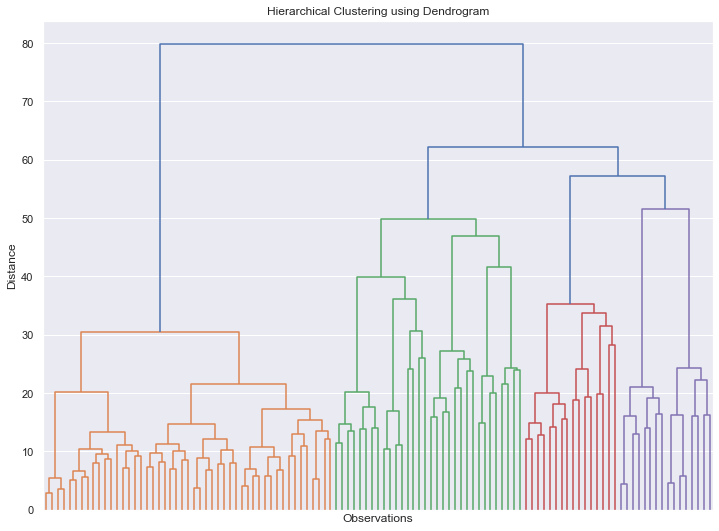

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering using Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hierarchical_clust,
           truncate_mode = 'level', 
           p = 6, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

### K- Means  Clustering

In [ ]:
#perform K- means with 9 clusters and iterations at a random state of 42
wcss = []
for i in range(1,9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(AIBL_std)
    wcss.append(kmeans.inertia_)

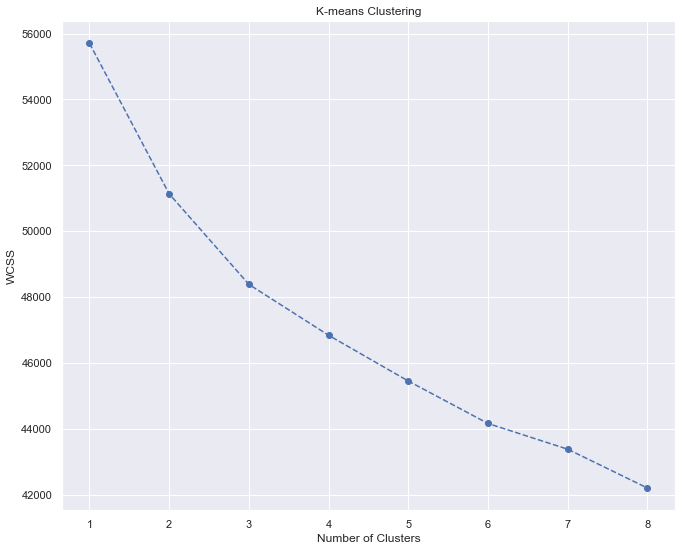

In [ ]:
#plot of Within Cluster Sum of squares to determine the number of cluster for the analysis
plt.figure(figsize = (11,9))
plt.plot(range(1, 9), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
# k- means with 4 clusters 
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 60)

In [ ]:
kmeans.fit(AIBL_std)

KMeans(n_clusters=4, random_state=60)

In [ ]:
#we created a copy of the original dataset  for clustering
AIBL_kmeans = AIBL.copy()
AIBL_kmeans['Segmentation K-means'] = kmeans.labels_

In [ ]:
# determine mean value for cluster
AIBL_analysis = AIBL_kmeans.groupby(['Segmentation K-means']).mean()
AIBL_analysis

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID
Segmentation K-means,,,,,,,,,,,,,,,,,,,,,
0,502.944444,3.400000,2.944444,1.422222,502.277778,0.011111,1.188889,30.455556,33.366667,240.177778,...,0.300000,0.133333,28.166667,82.055556,1.622222,89.988889,221.255556,0.288889,37.077778,1.355556
1,668.348074,3.271041,2.835949,1.375178,489.315264,0.000000,1.115549,30.540656,33.433666,248.472183,...,0.184023,0.299572,28.701854,80.122682,1.941512,88.934379,217.373752,0.044223,34.656205,1.322397
2,788.788136,3.716102,3.165254,1.444915,507.902542,0.745763,2.894068,30.415254,33.372881,235.720339,...,0.093220,0.322034,20.661017,83.131356,1.563559,91.830508,210.656780,0.211864,37.207627,1.266949
3,611.540091,3.314675,2.859304,1.478064,417.656581,0.001513,1.192133,30.998487,33.668684,204.953101,...,0.133132,0.148260,28.488654,81.738275,1.040847,94.428139,188.580938,0.399395,39.738275,1.331316


In [ ]:
#determine the number of observations and Proportion of observation for each cluster
AIBL_analysis['N Observations'] = AIBL_kmeans[['Segmentation K-means','PTDOB']].groupby(['Segmentation K-means']).count()
AIBL_analysis['Prop Observations'] = AIBL_analysis['N Observations'] / AIBL_analysis['N Observations'].sum()
AIBL_analysis=AIBL_analysis.rename({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'
                         })
AIBL_analysis

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,N Observations,Prop Observations
Segmentation K-means,,,,,,,,,,,,,,,,,,,,,
HC,502.944444,3.400000,2.944444,1.422222,502.277778,0.011111,1.188889,30.455556,33.366667,240.177778,...,28.166667,82.055556,1.622222,89.988889,221.255556,0.288889,37.077778,1.355556,90,0.053318
HC,668.348074,3.271041,2.835949,1.375178,489.315264,0.000000,1.115549,30.540656,33.433666,248.472183,...,28.701854,80.122682,1.941512,88.934379,217.373752,0.044223,34.656205,1.322397,701,0.415284
Non-HC,788.788136,3.716102,3.165254,1.444915,507.902542,0.745763,2.894068,30.415254,33.372881,235.720339,...,20.661017,83.131356,1.563559,91.830508,210.656780,0.211864,37.207627,1.266949,236,0.139810
Non-HC,611.540091,3.314675,2.859304,1.478064,417.656581,0.001513,1.192133,30.998487,33.668684,204.953101,...,28.488654,81.738275,1.040847,94.428139,188.580938,0.399395,39.738275,1.331316,661,0.391588


In [ ]:
# segment labels to the segmentation table
AIBL_kmeans['Labels'] = AIBL_kmeans['Segmentation K-means'].map({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})

### AGE WITH COGNITIVE ASSESSEMENT USING K-MEANS

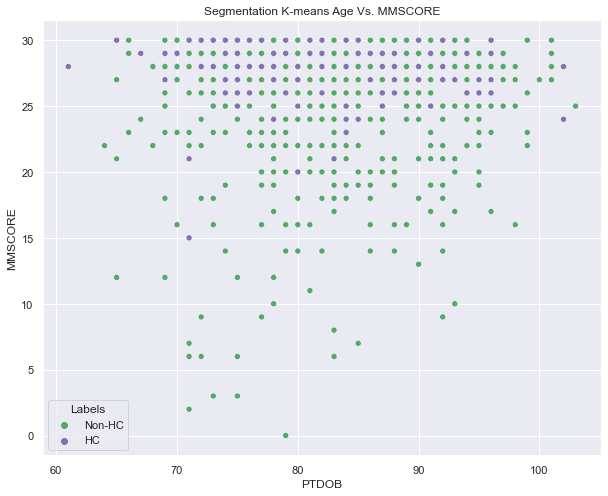

In [ ]:
# Age and MMSCORE
x_axis = AIBL_kmeans['PTDOB']
y_axis = AIBL_kmeans['MMSCORE']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age Vs. MMSCORE')
plt.show()

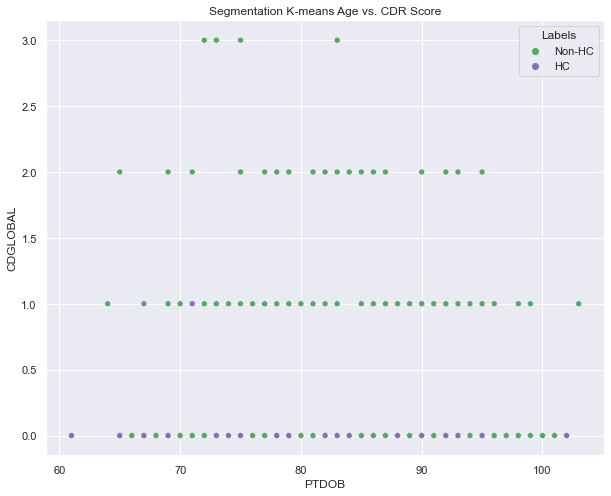

In [ ]:
# Age and CDR Score
x_axis = AIBL_kmeans['PTDOB']
y_axis = AIBL_kmeans['CDGLOBAL']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age vs. CDR Score')
plt.show()

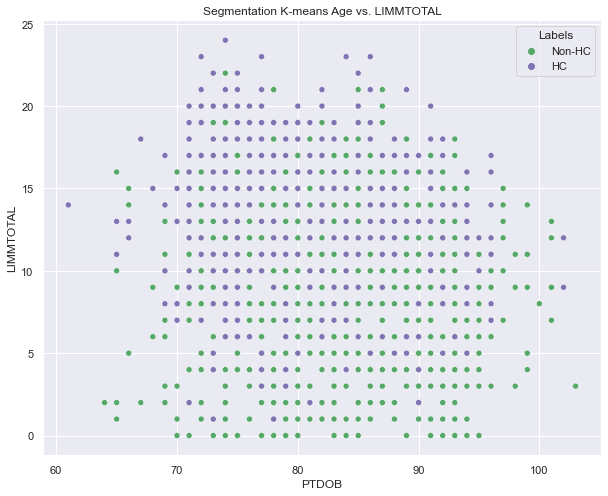

In [ ]:
# Age and Logical Memory Recal Score
x_axis = AIBL_kmeans['PTDOB']
y_axis = AIBL_kmeans['LIMMTOTAL']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_kmeans['Labels'], palette = ['g', 'm'])
plt.title('Segmentation K-means Age vs. LIMMTOTAL')
plt.show()

## Dimentionality Reduction Using PCA

In [ ]:
#PCA for dimentionality reduction and to create components subset
pca = PCA()

In [ ]:
# data standardization with pca
pca.fit(AIBL_std)

PCA()

In [ ]:
#displays how each variables explains the variance
pca.explained_variance_ratio_

array([0.11575918, 0.07659065, 0.06486892, 0.04903176, 0.04265796,
       0.04163761, 0.04012692, 0.03892748, 0.03557861, 0.03448262,
       0.03310055, 0.03155728, 0.03044453, 0.02909694, 0.02779718,
       0.02741846, 0.02702401, 0.02624079, 0.02616537, 0.02408558,
       0.02259845, 0.02110777, 0.01895728, 0.01817701, 0.01754916,
       0.01533075, 0.01478149, 0.01387502, 0.01151637, 0.00907106,
       0.00606544, 0.0054688 , 0.00290903])

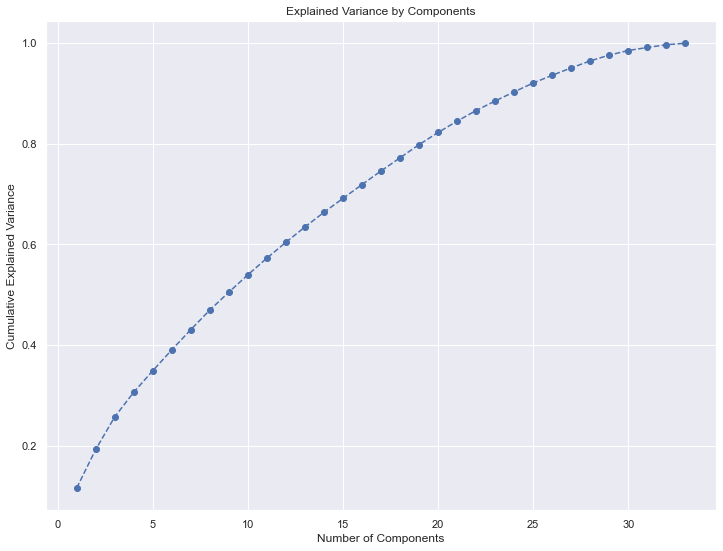

In [ ]:
#displays the cummulative explained by the components
plt.figure(figsize = (12,9))
plt.plot(range(1,34), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance');

In [ ]:
# determine the number of components 
pca = PCA(n_components = 4)

In [ ]:
#standadization of dataset
pca.fit(AIBL_std)

PCA(n_components=4)

### PCA Result

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = AIBL.columns.values,
                           index = ['Component 1', 'Component 2','Component 3', 'Component 4'])
df_pca_comp

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,MH9ENDO,MHPSYCH,MMSCORE,PTDOB,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID
Component 1,0.096453,0.173233,0.143984,0.012821,0.046635,0.378581,0.441570,-0.045537,-0.051062,0.018015,...,-0.045695,0.077105,-0.427469,0.089922,-0.026355,0.010228,0.002298,0.029012,0.006624,0.002340
Component 2,-0.050626,0.037263,0.008686,0.028025,-0.101058,-0.048207,-0.017415,0.149770,0.137227,-0.302467,...,0.011360,-0.184046,0.034411,0.108165,-0.496051,0.197330,-0.263623,0.335324,0.213176,0.035058
Component 3,-0.198319,-0.045493,-0.031578,0.060324,-0.005778,0.013577,-0.005447,0.292483,0.227599,0.119932,...,0.084697,0.022233,-0.016686,0.348641,0.047604,0.155292,-0.141214,0.212706,0.299324,-0.135654
Component 4,0.115124,-0.209987,-0.247911,-0.057870,0.122739,-0.049621,0.000640,-0.425948,-0.455869,-0.034405,...,0.317189,-0.058736,-0.004169,0.081780,0.042726,0.166369,-0.178699,0.076322,0.143038,0.168007


In [ ]:
#standardization of dataset for pca
pca.transform(AIBL_std)
scores_pca = pca.transform(AIBL_std)

In [ ]:
# K clustering with PCA
wcss = []
for i in range(1,9):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 60)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

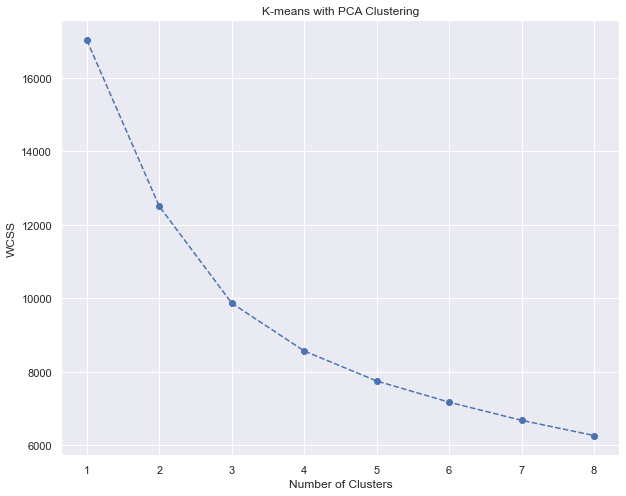

In [ ]:
#plot of Within Cluster Sum of squares to determine the number of cluster for the analysis
plt.figure(figsize = (10,8))
plt.plot(range(1, 9), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [ ]:
#k- means with 4 clusters and a random state of 60
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 60)

In [ ]:
#standardization
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=60)

### 𝐊-𝐦𝐞𝐚𝐧𝐬 𝐜𝐥𝐮𝐬𝐭𝐞𝐫𝐢𝐧𝐠 𝐰𝐢𝐭𝐡 𝐏𝐂𝐀 𝐑𝐞𝐬𝐮𝐥𝐭𝐬

In [ ]:
AIBL_pca_kmeans = pd.concat([AIBL.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
AIBL_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2','Component 3', 'Component 4']
AIBL_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
AIBL_pca_kmeans

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,RCT11,RCT20,RCT392,RCT6,SITEID,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,2,3,3,1,483,0,1,32,34,220,...,90,173,0,37,1,-1.394447,0.944256,-0.417559,-1.500997,3
1,2,3,3,1,397,0,1,32,34,190,...,88,181,0,51,1,-1.347043,1.320769,-0.177065,-1.521550,3
2,3,4,3,1,402,0,1,32,34,254,...,129,251,0,18,1,-0.478096,-2.122944,1.239489,-2.080343,0
3,3,4,3,2,435,0,1,31,33,311,...,97,266,0,23,1,-0.733511,-3.177443,0.649649,-1.716557,0
4,3,4,3,1,349,0,1,32,33,226,...,90,301,0,25,1,-0.137862,-2.897903,0.452717,-2.193851,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,1632,3,2,1,1246,0,2,30,34,127,...,91,158,0,26,2,0.798859,0.924388,-1.530743,2.005808,3
1684,1634,3,2,4,1043,0,1,31,33,188,...,97,185,0,25,2,1.284401,0.519065,-1.316725,1.791384,3
1685,1636,3,2,5,487,0,2,29,34,237,...,214,162,0,25,2,1.177268,3.461680,-1.145783,3.545718,3
1686,1637,3,2,1,284,0,2,31,33,183,...,100,297,0,20,2,-0.269441,1.056628,-4.072861,0.652841,3


In [ ]:
AIBL_pca_kmeans_freq = AIBL_pca_kmeans.groupby(['Segment K-means PCA']).mean()
AIBL_pca_kmeans_freq

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,PTGENDER,RCT11,RCT20,RCT392,RCT6,SITEID,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
0,660.739195,3.257824,2.837556,1.403875,490.150522,0.000000,1.092399,30.391952,33.372578,247.365127,...,1.926975,87.721311,220.749627,0.017884,33.342772,1.312966,-0.918303,-1.321123,-0.198907,0.016798
1,809.483471,3.698347,3.152893,1.384298,500.747934,0.727273,2.842975,30.376033,33.363636,235.322314,...,1.545455,91.115702,210.363636,0.185950,36.111570,1.272727,3.909783,-0.299268,-0.148846,-0.185673
2,495.641115,3.292683,2.818815,1.491289,451.083624,0.006969,1.226481,31.435540,33.682927,224.038328,...,1.348432,99.529617,178.519164,0.581882,46.383275,1.331010,-0.348574,0.937570,1.953723,0.675724
3,661.186475,3.362705,2.897541,1.444672,419.299180,0.000000,1.202869,30.844262,33.682377,204.241803,...,1.045082,92.325820,197.526639,0.301230,37.407787,1.346311,-0.471199,1.413554,-0.801704,-0.328425


In [ ]:
# Calculate the number of observations in the cluster and its proportion.
AIBL_pca_kmeans_freq['N obervations'] = AIBL_pca_kmeans[['Segment K-means PCA','PTDOB']].groupby(['Segment K-means PCA']).count()
AIBL_pca_kmeans_freq['Prop obervations'] = AIBL_pca_kmeans_freq['N obervations'] / AIBL_pca_kmeans_freq['N obervations'].sum()
AIBL_pca_kmeans_freq = AIBL_pca_kmeans_freq.rename({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})
AIBL_pca_kmeans_freq

,RID,APGEN1,APGEN2,AXT117,BAT126,CDGLOBAL,DXCURREN,HMT100,HMT102,HMT13,...,RCT20,RCT392,RCT6,SITEID,Component 1,Component 2,Component 3,Component 4,N obervations,Prop obervations
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,,
HC,660.739195,3.257824,2.837556,1.403875,490.150522,0.000000,1.092399,30.391952,33.372578,247.365127,...,220.749627,0.017884,33.342772,1.312966,-0.918303,-1.321123,-0.198907,0.016798,671,0.397512
HC,809.483471,3.698347,3.152893,1.384298,500.747934,0.727273,2.842975,30.376033,33.363636,235.322314,...,210.363636,0.185950,36.111570,1.272727,3.909783,-0.299268,-0.148846,-0.185673,242,0.143365
Non-HC,495.641115,3.292683,2.818815,1.491289,451.083624,0.006969,1.226481,31.435540,33.682927,224.038328,...,178.519164,0.581882,46.383275,1.331010,-0.348574,0.937570,1.953723,0.675724,287,0.170024
Non-HC,661.186475,3.362705,2.897541,1.444672,419.299180,0.000000,1.202869,30.844262,33.682377,204.241803,...,197.526639,0.301230,37.407787,1.346311,-0.471199,1.413554,-0.801704,-0.328425,488,0.289100


In [ ]:
#naming the segmentation of Kmeans PCA,HC and Non- HC (combining MCI and AD)
AIBL_pca_kmeans['Legend'] = AIBL_pca_kmeans['Segment K-means PCA'].map({0:'HC',1:'HC',2:'Non-HC',3:'Non-HC'})

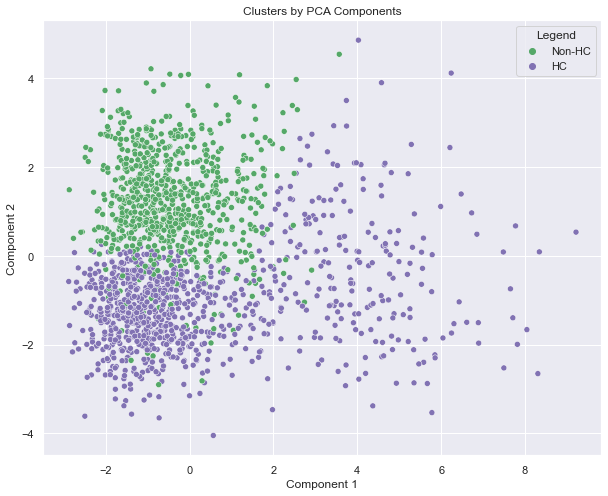

In [ ]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

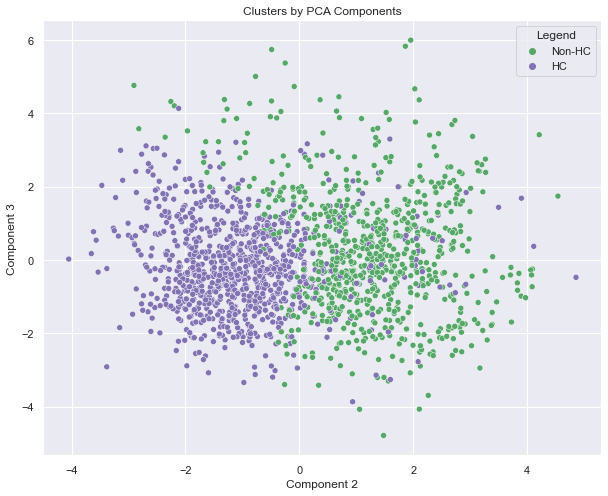

In [ ]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 2']
y_axis = AIBL_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

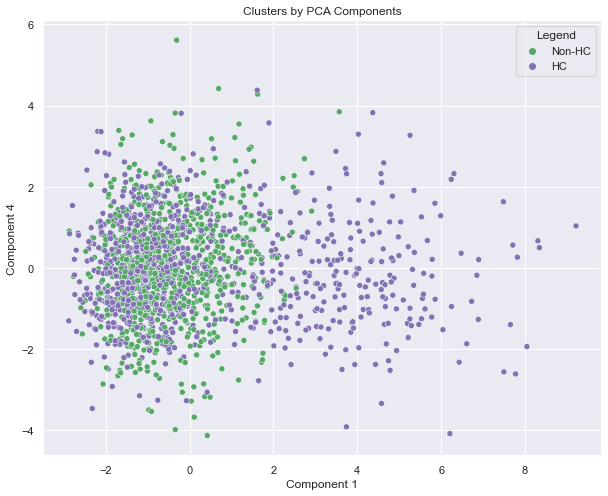

In [ ]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 4']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

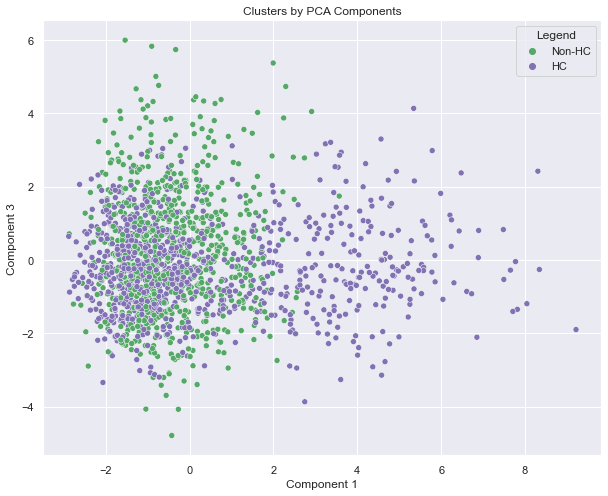

In [ ]:
# Plot data by PCA components
x_axis = AIBL_pca_kmeans['Component 1']
y_axis = AIBL_pca_kmeans['Component 3']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = AIBL_pca_kmeans['Legend'], palette = ['g',  'm'])
plt.title('Clusters by PCA Components')
plt.show()

## <center> MODEL SUMMARY </center>

IT WAS OBSERVED THAT EACH OF THE MODELS TESTED, PERFORMED DIFFERENTLY, OWING TO THE FACT THAT EACH MODEL WAS TRAINED WITH THE SAME DATASET.

HERE ARE THE SUMMARY FOR THIS PROJECT

1. THE DATASET HAD 1688 ROWS AND 36 COLUMNS
2. THE CORRELATION REPORT SHOWED THAT RID, SITEID, VISCODE, EXAMDATE, APTESTDT HAVE SIMILAR INFORMATION, SO THEY WILL BE DROPPED IN THE FIRST COPY OF THE DATASET USED FOR THE NAIVE BAYES MODELLING AND SUBSEQUENTLY IN OTHER SUPERVISED LEARNING MODELS
3. THE MISSING VALUES REPORT SHOWED THAT THERE WERE NO MISSING VALUES IN THE DATASET
4. AFTER DROPPING THE COLUMNS WITH SIMILAR INFORMATION, THE SHAPE OF THE UPDATED DATASET IS NOW HAVING 1688 ROWS AND 31 COLUMNS
5. THE DATASET SHOWED THAT MORE MALE WENT FOR DIAGNOSIS THAN FEMALE
6. THE DATASET SHOWED THAT THE RECORDS HAD A LARGE PROPORTION OF THE PEOPLE FALLING UNDER THE HEALTHY CONTROL GROUP (HC)
SOME OUTLIERS [-4, 7] WERE REPLACED WITH 1

### <center>SUPERVISED LEARNING</center>
USING THE ACCURACY METRICS AS PERFORMANCE ANALYSIS TOOL

#### FOR THE NAIVE BAYES MODEL

<b>STEPS</b>
1. THE DATASET WAS SPLITTED 80:20 (80% FOR TRAINING AND 20% FOR TESTING) USING A RANDOM STATE OF 42 FOR REPRODUCABILITY. </br>
2. FROM THE ANALYSIS, IT WAS DISCOVERED THAT HEALTHY CONTROL HAD MORE DATAPOINT THAN OTHER CATEGORY, SO THE TRAINING SET WAS OVERSAMPLED, TO ENABLE PROPER DISTRIBUTION OF THE CATEGORIES. </br>
3. TO MINIMIZE DATAPOINT NOISE, MINMAXSCALER WAS USED TO SET THE DATAPOINTS BETWEEN 0 AND 1
4. TESTING TWO SEQUANTIAL FEATURE SELECTION APPROACH (FORWARD AND BACKWARD) BY USING A FUNCTION TO CAPTURE THESE TWO METHODS, INORDER TO COMPARE THEIR PERFORMANCE
5. THE REPORT SHOWED THAT FORWARD SELECTION HAD 90% ACCURACY SCORE WHILE BACKWARD SELECTION HAD 89% ACCURACY SCORE, AND THE CROSS VALIDATION REPORT SHOWED 81% ACCURACY SCORE.
6. THE TRAINING ACCURACY OF THE NAIVE BAYES MODEL SHOWED 82% AND THE TEST ACCURACY OF THE MODEL STOOD AT 86%. WHICH IS A GOOD SIGN OF MODEL'S PREDICTION GENERABILITY
</br>
<b>THE NAIVE BAYES MODEL HAD AN ACCURACY OF 0.839 WHICH IS 86.3% PERFORMANCE ACCURACY </b>

</br>

#### XGBOOST MODEL

<b> STEPS </b>
1. CREATING A COPY OF THE DATASET
2. BEFORE PREPROCESSING, THE DATA HAD 1688 ROWS AND 36 COLUMNS
3. FOR THE PREPROCESSING, DROPPING SOME COLUMNS WITH SIMILAR INFORMATION
4. FURTHER DROPPING HIGHLY CORRELATED COLUMNS
5. SPLITTING THE EXAMYEAR INTO DAY, MONTH AND YEAR AND DROPPING THE EXAMYEAR COLUMN
6. AFTER DROPPING THE COLUMNS, THE DATASET HAD 1688 ROWS AND 28 COLUMNS
7. THE NEWLY CREATED EXAM DAY, MONTH AND YEAR HAD 7 MISSING VALUES.
8. DROPPED THE MISSING VALUES, AND THE UPDATED DATASET HAS 1681 ROWS AND 28 COLUMNS
9. USED SIMILAR MODELLING FOR NAIVE BAYES HERE, WHERE THE TRAIN SIZE IS 80% AND TEST SIZE IS 20%. AND ALSO OVER SAMPLED THE TRAINING DATA
###### XGBOOST MODELLING
USED A BOOSTING ALGORITHM WITH HYPERPARAMETER TUNING AND THE ACCURACY IS 92%
</br>
<b>THE XGBOOST BOOSTER HAD A PERFORMANCE METRICS OF 92% ACCURACY SCORE </b>

</br>

#### DECISION TREE MODEL

<b> STEPS </b>

1. USING THE SAME METHOD APPLIED IN THE XGBOOST MODEL,
2. INSTANTIATE THE DECISION TREE CLASSIFIER, AND TRAIN THE MODEL WITH THE TRAINING DATA\
3. MAKE PREDICTIONS WITH THE MODEL AND COMPUTE THE ACCURACY SCORE WHICH SHOWED 87% ACCURACY OF THE MODEL
4. CARRY OUT HYPERPARAMETER TUNING TO IMPROVE THE MODEL'S PERFORMANCE.
AFTER THE TUNING, THE MODEL DID NOT PERFORM BETTER, IT STILL SHOWED 87% ACCURACY. WHICH IS A SIGN THAT THE MODEL WOULD NEED MORE TRAINING DATA TO IMPROVE ITS PERFORMANCE.
</br>
<b>THE DECISION TREE DID SOMEHOW EXHIBITED A STRANGE MODEL BEHAVIOUR, FIRST THE DEFAULT DECISION TREE PRODUCED AN 87% AND THE HYPERPARAMETERIZED TUNING OF IT, STILL PRODUCED THE SAME SCORE OF 87%</b>

#### RANDOM FOREST MODEL

<b> STEPS </b>

1. USING THE SAME DATASET FROM PREVIOUS MODELS, AND GOING FORWARD WITH SIMILAR MODELLING EXCEPT IN THIS CASE, THERE IS A NEED TO KNOW THE LEVEL OF IMPORTANCE EACH FEATURE POSES TO THE TARGET VARIABLE.
2. USING A TEST SIZE OF 20% AND A TRAIN SIZE OF 80% AS DONE WITH OTHER MODELS
3. FOR THE FEATURE IMPORTANCE, FIT THE MODEL AND EXTRACT THE FEATURE IMPORTANCE AND THEIR RESPECTIVE SCORES
4. USING A SLICE OF SOME SELECTED SOLUMNS FROM THE ORIGINAL DATASET, AND CREATE SUBPLOTS SHOWING THE RELATIONSHIP BETWEEN THE INDEPENDENT VARIABLES AND THE DEPENDENT VARIABLE
5. FROM THE PLOTS, THERE IS A CLEAR CDGLOBAL AND MHPSYCH COLUMNS SHOWED STRONG RELATIONSHIP WITH THE TARGET VARIABLE

###### MODELLING APPROACH 
1. INSTANTIATE THE RANDOMFOREST CLASSIFIER
2. FIT THE MODEL WITH THE TRAIN SET
3. PREDICT THE MODEL'S PERFORMANCE
4. PLOT THE CONFUSION MATRIX FOR THE MODEL
</br>

<b>THE RANDOMFOREST DID ACTUALLY GENERATE AN IMPRESSIVE 90% ACCURACY SCORE</b>

### SUPERVISED LEARNING MODELS PLOT SUMMARY

<AxesSubplot:title={'center':'NAIVE BAYES MODEL'}>

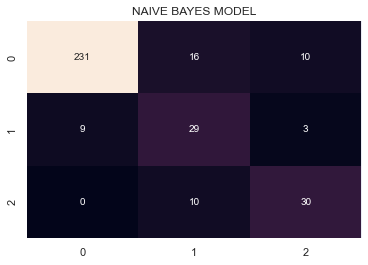

In [ ]:
#Plot for Naive Bayes
plt.title("NAIVE BAYES MODEL")
sns.heatmap(n_cnf_matrix, annot=True, cbar=False, fmt='g')

<AxesSubplot:title={'center':'XGBoost Model'}>

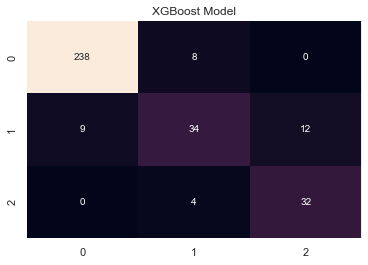

In [ ]:
#Plot for XGboost
plt.title("XGBoost Model")
sns.heatmap(x_c_mat, annot=True, fmt='d', cbar=False)

<AxesSubplot:title={'center':'DECISION TREE MODEL'}>

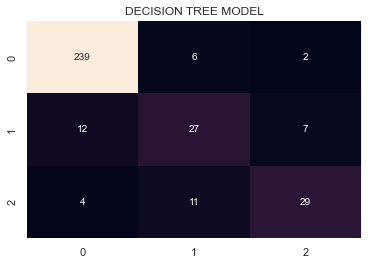

In [ ]:
#Plot for decision tree
plt.title("DECISION TREE MODEL")
sns.heatmap(d_cnf_matrix, annot=True, cbar=False, fmt='g')

<AxesSubplot:title={'center':'RANDOM FOREST MODEL'}>

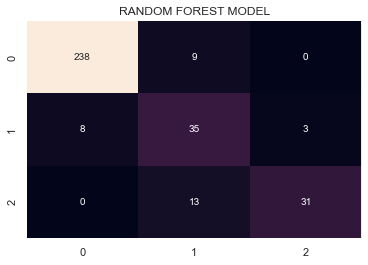

In [ ]:
#plot for random forest
plt.title("RANDOM FOREST MODEL")
sns.heatmap(rf_cnf_matrix, annot=True, cbar=False, fmt='d')

FROM THE CONFUSION MATRIX, RANDOM FOREST PERFORMED BETTER THAN OTHER MODELS, ALTHOUGH WITH FURTHER FINETUNING, NAIVE BAYES, AND XGBOOST COULD IMPROVE ON THEIR PERFORMANCE

### <center> UNSUPERVISED LEARNING </center>

##### <b> STARTING WITH HEIRARCHICAL CLUSTERING</b>

</br>
<b>STEPS</b>

1. LOAD A COPY OF THE DATASET
2. CLEANING THE DATASET VIA RESOLVING ANOMALIES AND STANDARDIZATION OF THE AFFECTED COLUMNS
3. CHECK AND PLOT THE CORRELATION USING SEABORN HEATMAP
4. USING STANDARDSCALER TO SET A WEIGHT RANGE FOR ALL THE FEATURES
5. FEEDING THE SCALED DATASET INTO THE HEIRARCHICAL CLUSTERING MODEL USING THE WARD METHOD WHICH WOULD ENABLE THE DATASET TO BE STRUCTURED DOWNWARD TO UPWARD HEIRARCHY WITHOUT OMITTING ANY FEATURE. (BECAUSE WE HAD A FOURTH CLASS IN THE TARGET VARIABLE, THE DENDOGRAM DISPLAYED A FOURTH WARD IN THE PLOT)

##### <b> K-MEANS CLUSTERING</b>
</br>
<b>STEPS</b>

1. CREATE A 9 CLUSTERS AND ITERATE THROUGH THE CLUSTERS USING A RANDOM STATE OF 42
2. FOR EACH CLUSTERS, PLOT THE DATA CLUSTERING (THE PLOT SHOWED A DOWNWARD SLOPE FROM CLUSTER 1 TO CLUSTER 8
3. REPEAT THE SAME WITH 4 CLUSTERS, WITH RANDOM STATE 60
4. SEGMENT THE K-MEANS AND CLUSTER THEM BASED ON THEIR MEAN VALUE
5. PLOT AGE COLUMN AGAINST SOME RELATED COLUMNS TO SEE HOW THEY ARE CLUSTERED
6. RESULT SHOWED THAT SOME COLUMNS TEND TO CLUSTER WELL TOGETHER DEPENDING ON THE PARTICULAR COLUMN SELECTED (USING PTDOB AS EXAMPLE HERE)

</br>

##### <b> DIMENSIONALITY REDUCTION USING PCA</b>
</br>
<b>STEPS</b>
                                                
1. INSTANTIATE THE PCA MODEL
2. FIT THE STANDARDIZED DATASET INTO THE MODEL
3. USING EACH FEATURE TO UNDERSTAND HOW THEY EXPLAIN THE VARIANCE IN THE DATASET
4. PLOTTING THE VARIANCE BY TAKING THE SUM OF THE VARIANCE RATIO
5. DIVIDING THE DATA COMPONENT TO 4 FOR BETTER ANALYSIS
6. FIT THE NEW COMPONENT WITH THE DATASET
7. LOAD THE NEW COMPONENT DATA INTO A PANDAS DATAFRAME
8. WITH THE RESULT ACQUIRED, CREATE A NEW PCA TRANSFORMED DATASET, AND FEED IT INTO KMEAN. 
</br>K CLUSTERING IS TO PREVIEW THE CLUSTER OF THE DATA POINTS
10. MERGE THE PCA VALUES WITH THE REAL DATASET AND CALCULATE THE NO OF OBSERVATION WITH REFERENCE TO THE AGE 
11. PLOT THE K MEAN CLUSTERING WITH THE LEGEND SET TO EITHER HC OR NON-HC

DIMENSIONALITY REDUCTION HELPED TO CREATE A CLUSTERING THAT IS INTER-RELATED, AS THIS IS IMPORTANT IN IDENTIFYING THE RELATIONSHIP BETWEEN THE FEATURES OF THE DATASET

# <center> SUGGESTIONS </center>

1. FOR BETTER ANALYSIS, MORE DATA IS NEEDED FOR BOTH THE SUPERVISED AND UNSUPERVISED LEARNING. 
SO GOING FORWARD, THERE IS A NEED TO COLLATE MORE DATASET 

2. THE NATURE OF DATA PROPROCESSING AND EDA CAN BE IMPROVED UPON WHEN THE FIRST SUGGESTION IS TAKEN CARE OF
3. IT WAS OBSERVED THAT UNSUPERVISED LEARNING IS NOT A SUITABLE METHOD FOR THIS KIND OF DATASET, THE NATURE OF THE DATASET LOOKS CURATED FOR SUPERVISED LEARNING.